# Project Description:

A project from Medical domain. The dataset created by Max Little of the University of Oxford in collaboration with the National Centre for Voice and Speech, Denver, Colorado, is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease.

# Context:

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The dataset is extracted from the paper: 'Exploiting NonLinear Recurrence and Fractual Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering Online 2007, 6:23 (23 June, 2007)

# Data Description:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

The columns are as follows:

- **name** - ASCII subject name and recording number

- **MDVP:Fo(Hz)** - Average vocal fundamental frequency

- **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

- **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

- **MDVP:Jitter(%)**, **MDVP:Jitter(Abs)**, **MDVP:RAP**, - **MDVP:PPQ**, **Jitter:DDP** - Several measures of variation in fundamental frequency

- **MDVP:Shimmer**, **MDVP:Shimmer(dB)**, - - - **Shimmer:APQ3**, **Shimmer:APQ5**, **MDVP:APQ**, **Shimmer:DDA** - Several measures of variation in amplitude

 - **NHR**, **HNR** - Two measures of ratio of noise to tonal components in the voice

- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

- **RPDE**, **D2** - Two nonlinear dynamical complexity measures

- **DFA** - Signal fractal scaling exponent

- **spread1**, **spread2**, **PPE** - Three nonlinear measures of fundamental frequency variation.

# Objective:

**The goal is to classify the patients into the respective labels using the attributes from their voice recordings.**

### Import necessary libraries

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import system
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import tree

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load the dataset

In [171]:
parkinson_data = pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/USL/PCA/Data/Data - Parkinsons')

In [172]:
parkinson_data.to_csv("park.csv")

### 2. Eye-balling the raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

One of the biggest challenge in the dataset according to me is understanding the each and every attributes clearly i.e., what the attributes mean. The attributes are heavily doused with medical terms, which makes it quite difficult to understand what each attributes mean without having sufficient domain knowledge.

#### Shape of the data

In [173]:
parkinson_data.shape

(195, 24)

The two-dimensional dataframe i.e., parkinson_data consists of 195 rows and 24 columns.

#### Dataframe of each attribute

In [174]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [175]:
parkinson_data.to_excel("test.xlsx")

All the attributes apart from **name** contains numerical values.

#### To check presence of missing values

In [176]:
parkinson_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


None of the columns have null values.

In [177]:
parkinson_data.duplicated().sum()

np.int64(0)

#### Finding unique value in each attribute

In [178]:
parkinson_data.apply(lambda x: len(x.unique()))

,0
name,195
MDVP:Fo(Hz),195
MDVP:Fhi(Hz),195
MDVP:Flo(Hz),195
MDVP:Jitter(%),173
MDVP:Jitter(Abs),19
MDVP:RAP,155
MDVP:PPQ,165
Jitter:DDP,180
MDVP:Shimmer,188


As informed in the **Data Description** section mentioned above, we can see that apart from the attribute **status**, every other attribute has continuous values.

As attribute **name** is not useful for this analysis we can make it as index.

In [179]:
parkinson_data = parkinson_data.set_index('name')
parkinson_data.head().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(%),0.007840,0.009680,0.010500,0.009970,0.012840
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000


### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statisitics such as central values, spread, tails, relationships between variables etc.

#### 5 point summary of numerical attributes

In [180]:
parkinson_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


The numerical attributes are summarised in the following manner:

i. **MDVP:Fo(Hz)**: There are 195 records with a mean value of 154.23 Hz. The minimum and maximum frequency recorded by the individuals are 88.33 Hz and 260.11 Hz respectively. 25% of people have an average vocal fundamental frequency under 117.57 Hz, 50% of people have an average vocal fundamental frequency under 148.79 Hz whereas 75% of people have an average vocal fundamental frequency under 182.77 Hz. Also, the observations differ from the mean value by 41.39 Hz

ii. **MDVP:Fhi(Hz)**: There are 195 records with a mean value of 197.10 Hz. The greatest minimum and maximum frequency recorded over period-to-period by the individuals are 102.15 Hz and 592.03 Hz respectively. For 25% of the observed people the value is under 134.86 Hz, for 50% of people it is under 175.83 Hz whereas for 75% of people it is under 224.21 Hz. Also, the observations differ from the mean value by 91.49 Hz

iii. **MDVP:Flo(Hz)**: There are 195 records with a mean value of 116.32 Hz. The lowest minimum and maximum frequency recorded over period-to-period by the individuals are 65.48 Hz and 239.17 Hz respectively. For 25% of the observed people the value is under 84.29 Hz, for 50% of people it is under 104.32 Hz whereas for 75% of people it is under 140.02 Hz. Also, the observations differ from the mean value by 43.52 Hz

iv. **MDVP:Jitter(%)**: There are 195 records with a mean value of 0.0062%. The minimum and maximum value recorded for the observed individuals are 0.00168% and 0.03316% respectively. For 25% of the observed people the value is under 0.00346%, for 50% of people it is under 0.00494% whereas for 75% of people it is under 0.007365%. Also, the observations differ from the mean value by 0.0049%

v. **MDVP:Jitter(Abs)**: There are 195 records with a mean value of 0.000044. The minimum and maximum variablitity of the pitch within the analyzed voice sample for the observed individuals are 0.000007 and 0.00026 respectively. For 25% of the observed people the value is under 0.00002, for 50% of people it is under 0.00003 whereas for 75% of people it is under 0.00006. Also, the observations differ from the mean value by 0.000035

vi. **MDVP:RAP**: There are 195 records with a mean value of 0.003306. The minimum and maximum variablitity of the pitch within the analyzed voice sample with a smoothing factor (of 3 periods) for the observed individuals are 0.00068 and 0.021440 respectively. For 25% of the observed people the value is under 0.00166, for 50% of people it is under 0.0025 whereas for 75% of people it is under 0.003835. Also, the observations differ from the mean value by 0.002968

vii. **MDVP:PPQ**: There are 195 records with a mean value of 0.003446. The minimum and maximum variablitity of the pitch within the analyzed voice sample with a smoothing factor (of 5 periods) for the observed individuals are 0.00092 and 0.01958 respectively. For 25% of the observed people the value is under 0.00186, for 50% of people it is under 0.00269 whereas for 75% of people it is under 0.003955. Also, the observations differ from the mean value by 0.002759

viii. **Jitter:DDP**: There are 195 records with a mean value of 0.00992. For the observed persons it ranges from 0.00204 to 0.06433. For 25% of the observed people the value is under 0.004985, for 50% of people it is under 0.00749 whereas for 75% of people it is under 0.011505. Also, the observations differ from the mean value by 0.008903

ix. **MDVP:Shimmer**: There are 195 records with a mean value of 0.0297. For the observed persons it ranges from 0.00954 to 0.11908. For 25% of the observed people the value is under 0.016505, for 50% of people it is under 0.02297 whereas for 75% of people it is under 0.037885. Also, the observations differ from the mean value by 0.018857

x. **MDVP:Shimmer(dB)**: There are 195 records with a mean value of 0.28 dB. For the observed persons it ranges from 0.085 dB to 1.302 dB. For 25% of the observed people the value is under 0.149 dB, for 50% of people it is under 0.221 dB whereas for 75% of people it is under 0.35 dB. Also, the observations differ from the mean value by 0.195 dB

xi. **Shimmer:APQ3**: There are 195 records with a mean value of 0.015664. For the observed persons it ranges from 0.00455 to 0.05647. For 25% of the observed people the value is under 0.008245, for 50% of people it is under 0.01279 whereas for 75% of people it is under 0.020265. Also, the observations differ from the mean value by 0.010153

xii. **Shimmer:APQ5**: There are 195 records with a mean value of 0.017878. For the observed persons it ranges from 0.0057 to 0.0794. For 25% of the observed people the value is under 0.00958, for 50% of people it is under 0.01347 whereas for 75% of people it is under 0.02238. Also, the observations differ from the mean value by 0.012024

xiii. **MDVP:APQ**: There are 195 records with a mean value of 0.024081. For the observed persons it ranges from 0.00719 to 0.13778. For 25% of the observed people the value is under 0.01308, for 50% of people it is under 0.01826 whereas for 75% of people it is under 0.0294. Also, the observations differ from the mean value by 0.016947

xiv. **Shimmer:DDA**: There are 195 records with a mean value of 0.046993. For the observed persons it ranges from 0.01364 to 0.16942. For 25% of the observed people the value is under 0.024735, for 50% of people it is under 0.03836 whereas for 75% of people it is under 0.060795. Also, the observations differ from the mean value by 0.030459

xv. **NHR**: There are 195 records with a mean value of 0.024847. For the observed persons it ranges from 0.00065 to 0.31482. For 25% of the observed people the value is under 0.00065, for 50% of people it is under 0.005925 whereas for 75% of people it is under 0.01166. Also, the observations differ from the mean value by 0.040418

xvi. **HNR**: There are 195 records with a mean value of 21.885974. For the observed persons it ranges from 8.441 to 33.047. For 25% of the observed people the value is under 19.198, for 50% of people it is under 22.085 whereas for 75% of people it is under 25.0755. Also, the observations differ from the mean value by 4.425764

xvii. **status**: It is clear that the maximum number of observed individuals does have Parkinson Disease.

xviii. **RPDE**: There are 195 records with a mean value of 0.498536. For the observed persons it ranges from 0.25657 to 0.685151. For 25% of the observed people the value is under 0.421306, for 50% of people it is under 0.495954 whereas for 75% of people it is under 0.587562. Also, the observations differ from the mean value by 0.103942

xix. **DFA**: There are 195 records with a mean value of 0.718099. For the observed persons it ranges from 0.574282 to 0.825288. For 25% of the observed people the value is under 0.674758, for 50% of people it is under 0.722254 whereas for 75% of people it is under 0.761881. Also, the observations differ from the mean value by 0.055336

xx. **spread1**: There are 195 records with a mean value of -5.684397. For the observed persons it ranges from -7.964984 to -2.434031. For 25% of the observed people the value is under -6.450096, for 50% of people it is under -5.720868 whereas for 75% of people it is under -5.046192. Also, the observations differ from the mean value by 0.008903

xxi. **spread2**: There are 195 records with a mean value of 0.22651 For the observed persons it ranges from 0.006274 to 0.450493. For 25% of the observed people the value is under 0.174351, for 50% of people it is under 0.218885 whereas for 75% of people it is under 0.279234. Also, the observations differ from the mean value by 0.083406

xxii. **D2**: There are 195 records with a mean value of 2.381826. For the observed persons it ranges from 1.423287 to 3.671155. For 25% of the observed people the value is under 2.099125, for 50% of people it is under 2.361532 whereas for 75% of people it is under 2.636456. Also, the observations differ from the mean value by 0.382799

xxiii. **PPE**: There are 195 records with a mean value of 0.206552. For the observed persons it ranges from 0.044539 to 0.527367. For 25% of the observed people the value is under 0.137451, for 50% of people it is under 0.194052 whereas for 75% of people it is under 0.25298. Also, the observations differ from the mean value by 0.090119.

#### Univariate Analysis:

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())

    print(df[column].skew())

In [182]:
parkinson_data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

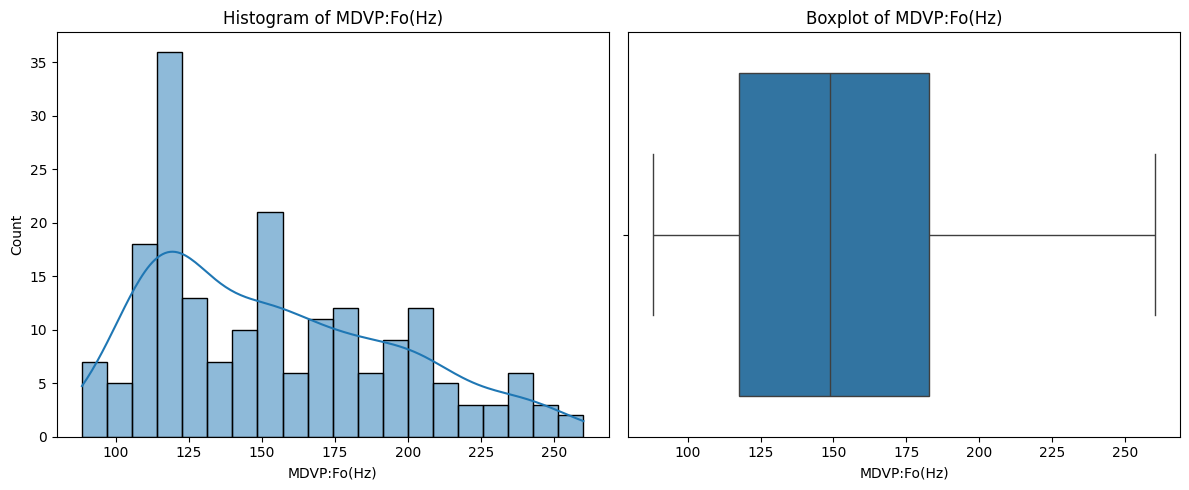

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64
0.5917374636540784


In [183]:
histogram_boxplot(parkinson_data,'MDVP:Fo(Hz)')


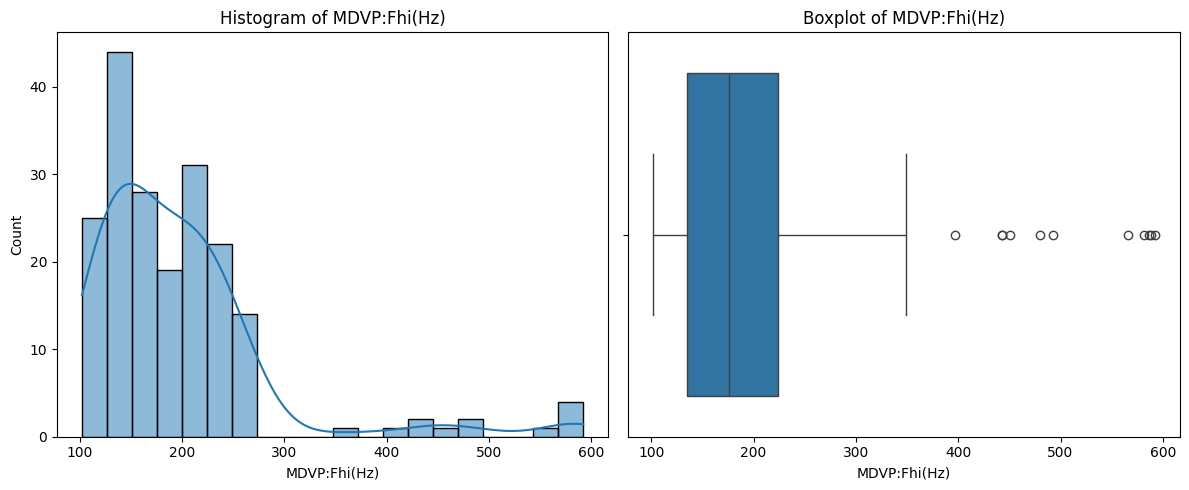

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64
2.542145997588398


In [184]:
histogram_boxplot(parkinson_data,'MDVP:Fhi(Hz)')


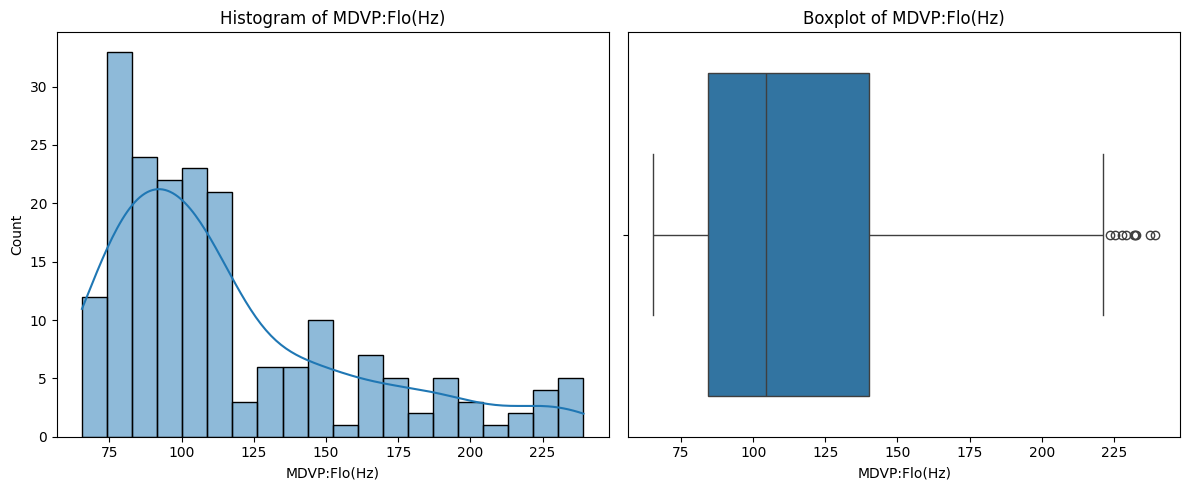

count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64
1.217350448627808


In [185]:
histogram_boxplot(parkinson_data,'MDVP:Flo(Hz)')


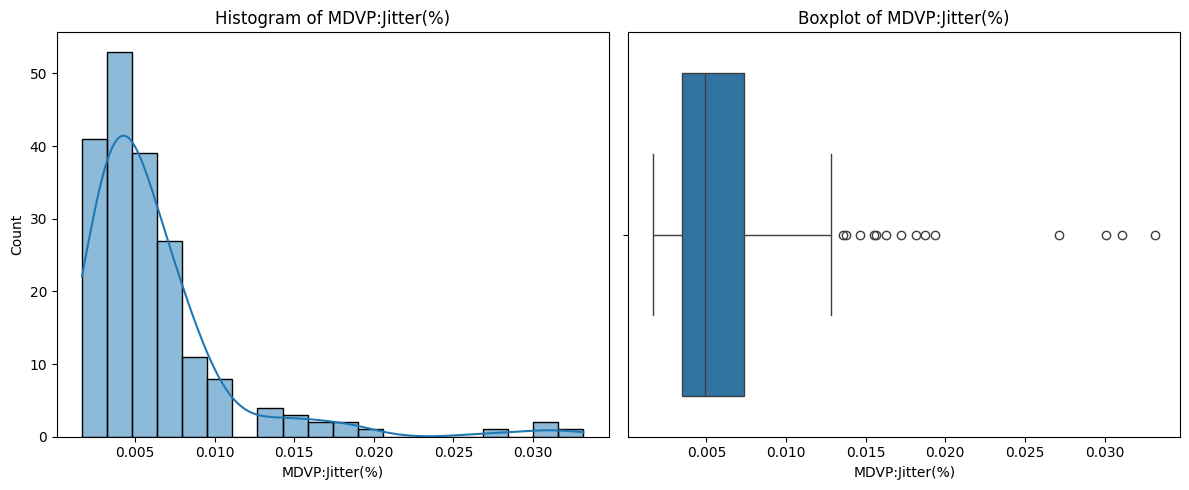

count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: MDVP:Jitter(%), dtype: float64
3.0849462014441826


In [186]:
histogram_boxplot(parkinson_data,'MDVP:Jitter(%)')


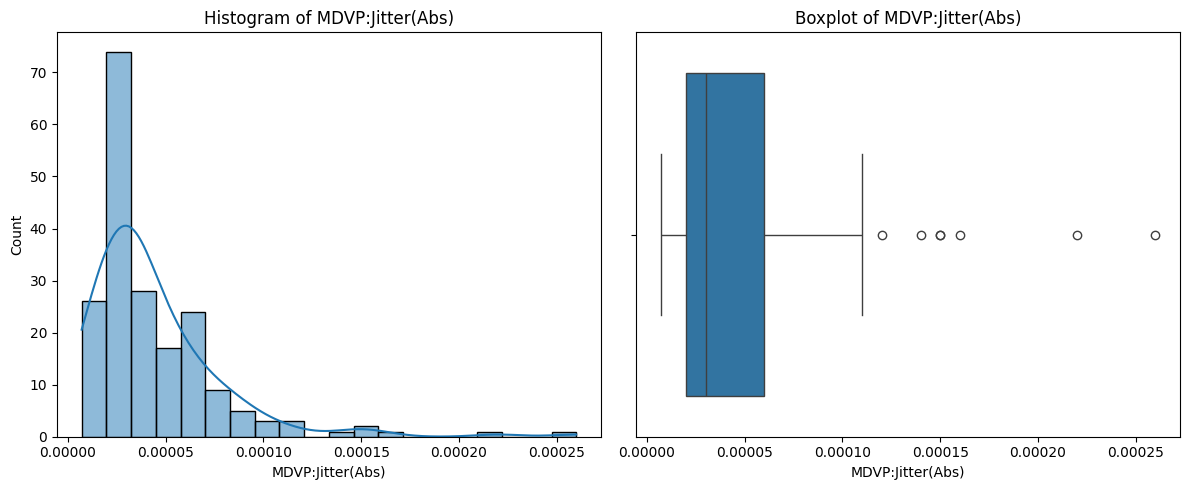

count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64
2.6490714165257274


In [187]:
histogram_boxplot(parkinson_data,'MDVP:Jitter(Abs)')


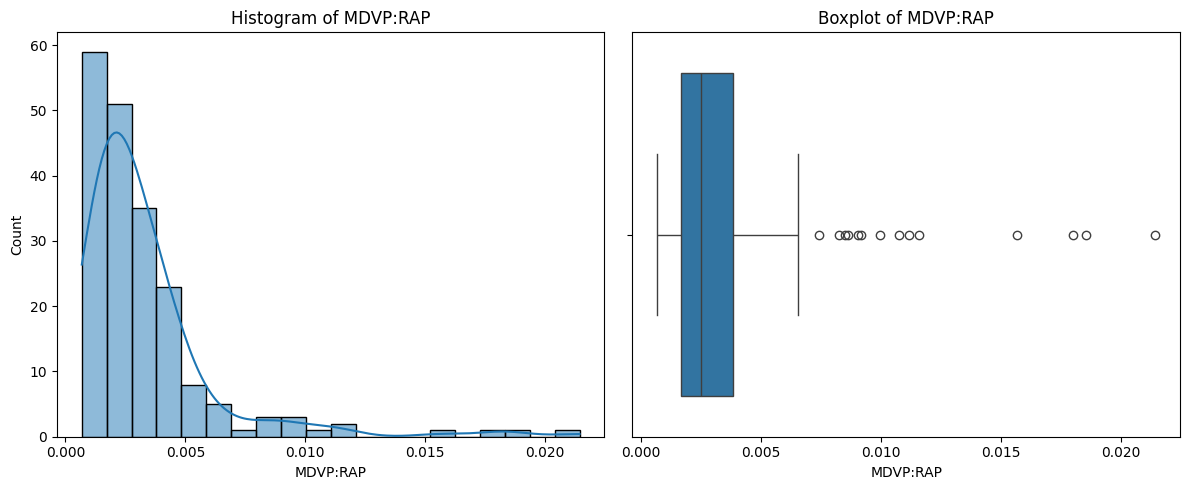

count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: MDVP:RAP, dtype: float64
3.3607084504805544


In [188]:
histogram_boxplot(parkinson_data,'MDVP:RAP')


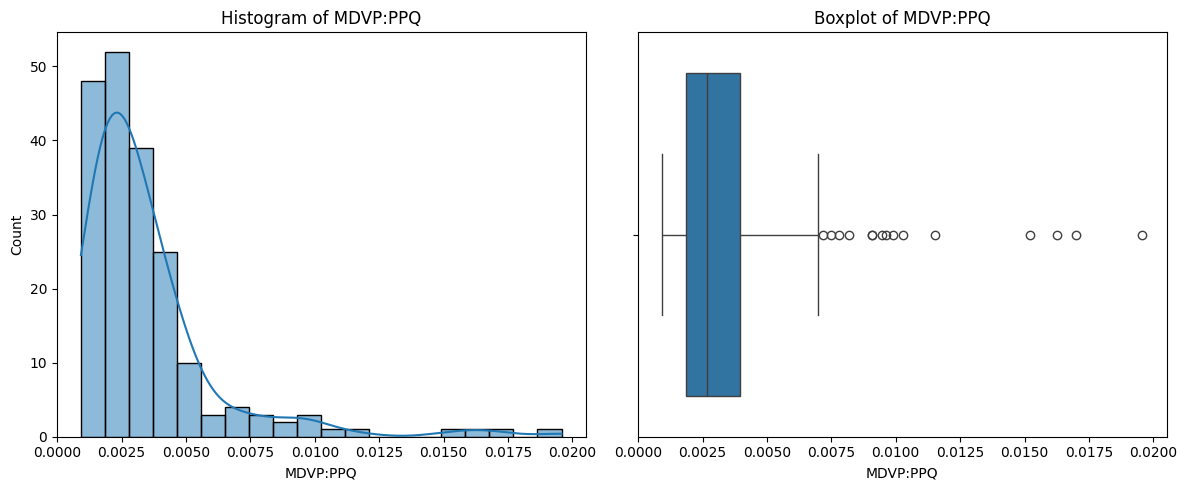

count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: MDVP:PPQ, dtype: float64
3.0738924578885167


In [189]:
histogram_boxplot(parkinson_data,'MDVP:PPQ')


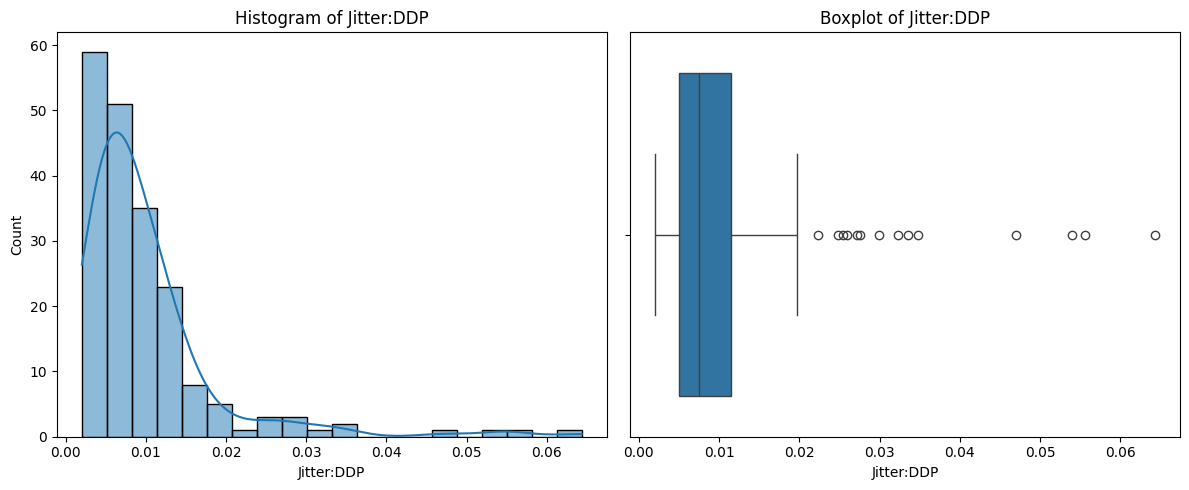

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: Jitter:DDP, dtype: float64
3.36205844788572


In [190]:
histogram_boxplot(parkinson_data,'Jitter:DDP')


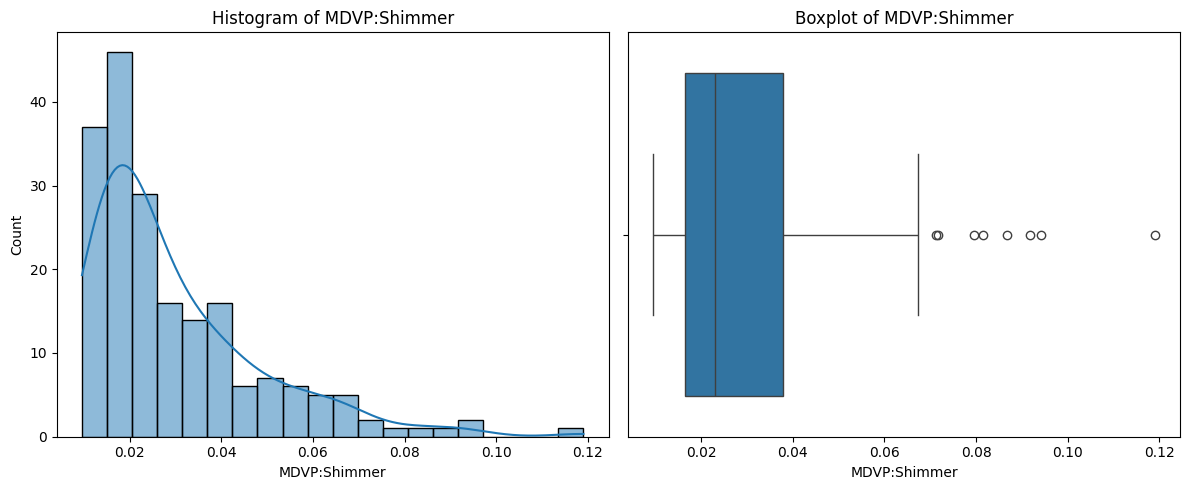

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: MDVP:Shimmer, dtype: float64
1.6664804101559665


In [191]:
histogram_boxplot(parkinson_data,'MDVP:Shimmer')


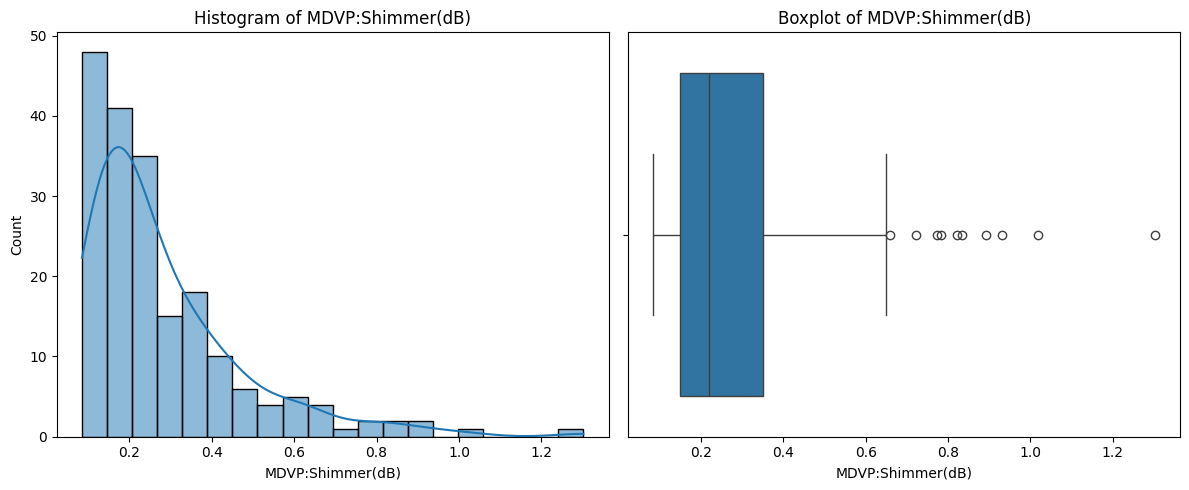

count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: MDVP:Shimmer(dB), dtype: float64
1.999388639086127


In [192]:
histogram_boxplot(parkinson_data,'MDVP:Shimmer(dB)')


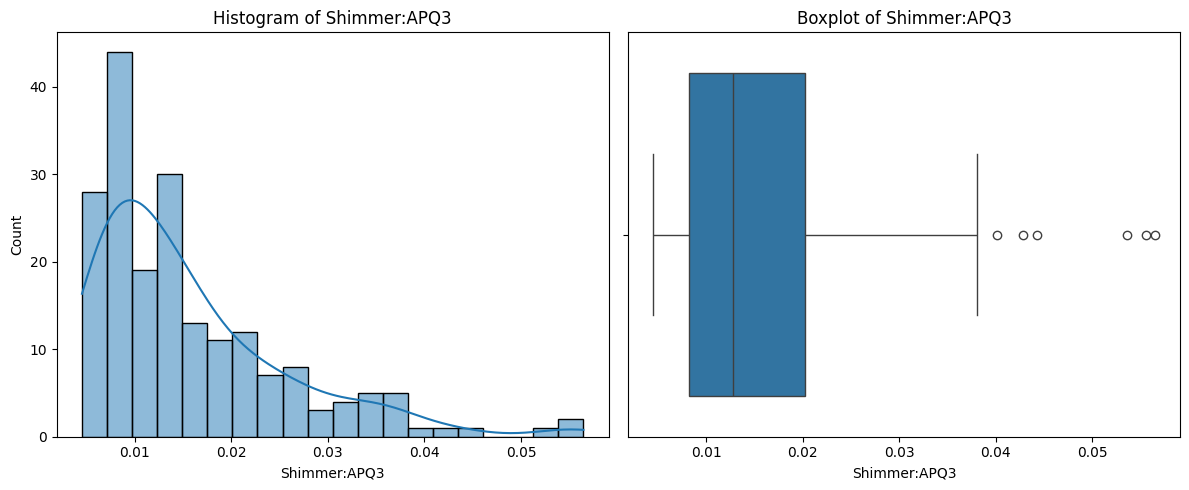

count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: Shimmer:APQ3, dtype: float64
1.5805763798815669


In [193]:
histogram_boxplot(parkinson_data,'Shimmer:APQ3')


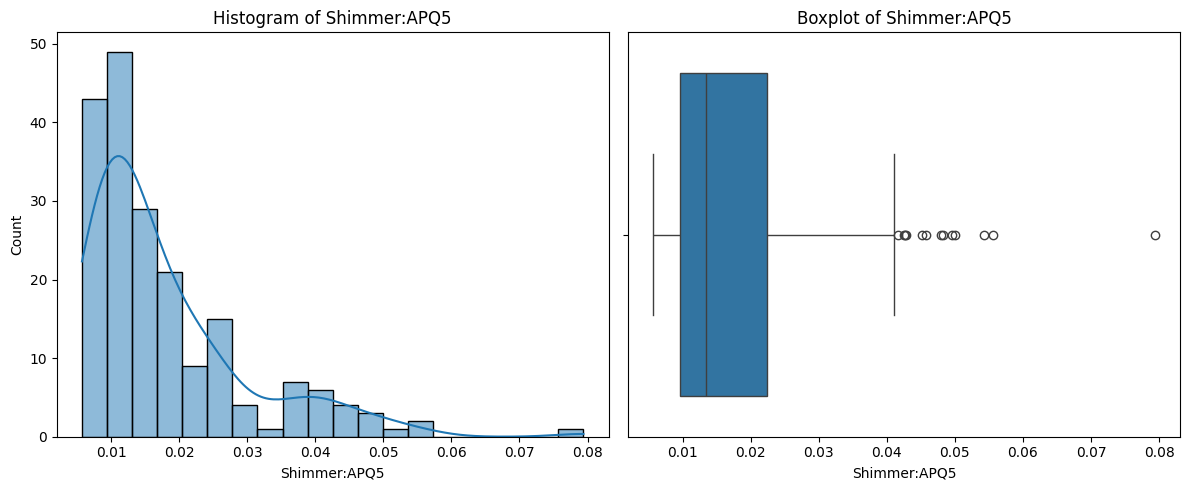

count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: Shimmer:APQ5, dtype: float64
1.7986970665376225


In [194]:
histogram_boxplot(parkinson_data,'Shimmer:APQ5')


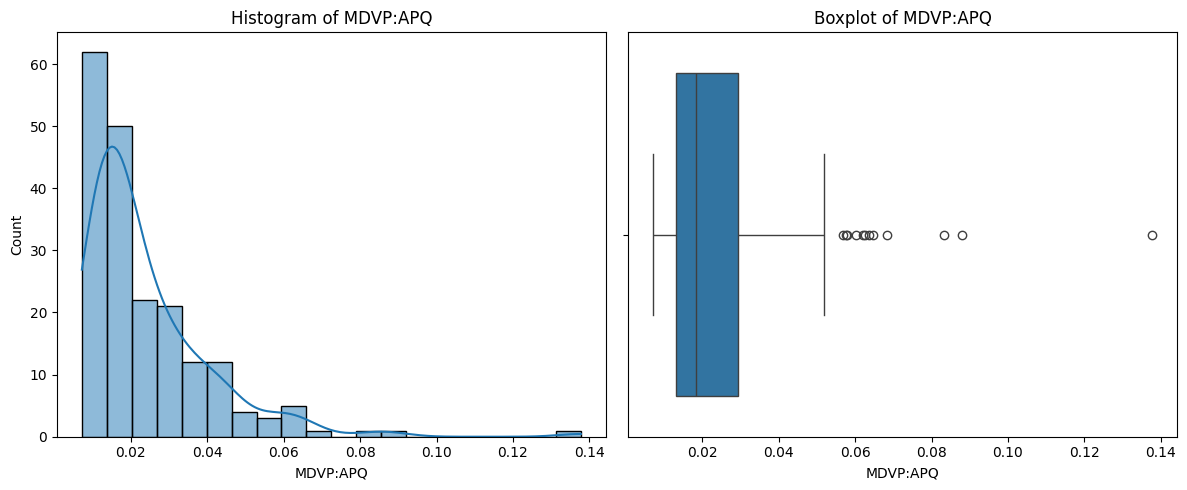

count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: MDVP:APQ, dtype: float64
2.6180465022154227


In [195]:
histogram_boxplot(parkinson_data,'MDVP:APQ')


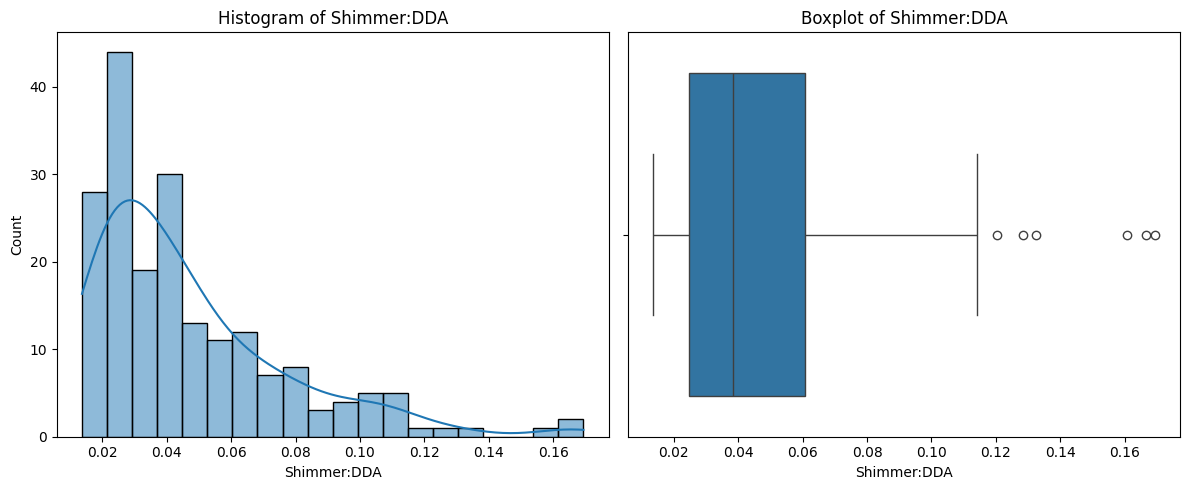

count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: Shimmer:DDA, dtype: float64
1.5806179936782254


In [196]:
histogram_boxplot(parkinson_data,'Shimmer:DDA')


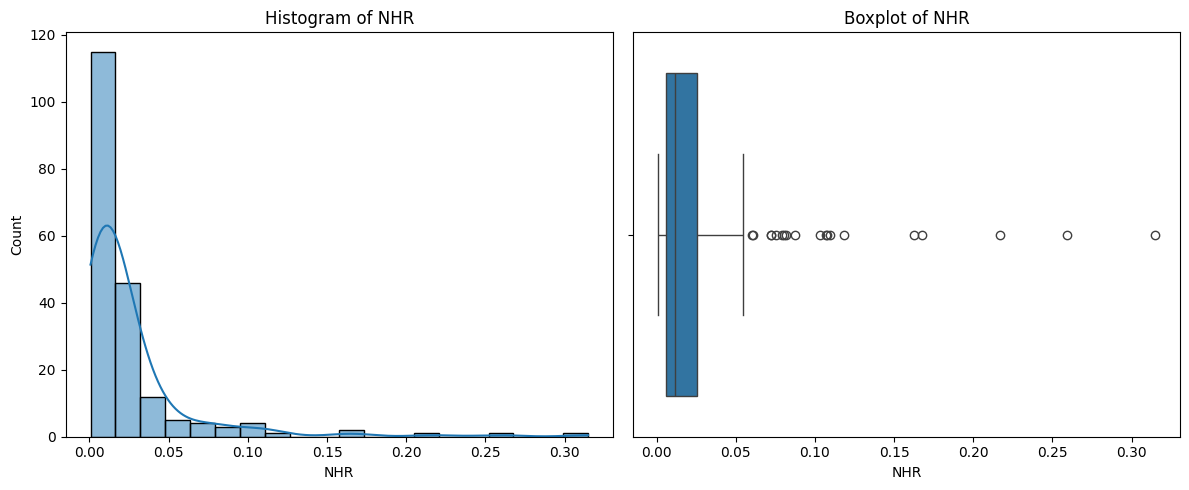

count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: NHR, dtype: float64
4.2207091291390615


In [197]:
histogram_boxplot(parkinson_data,'NHR')


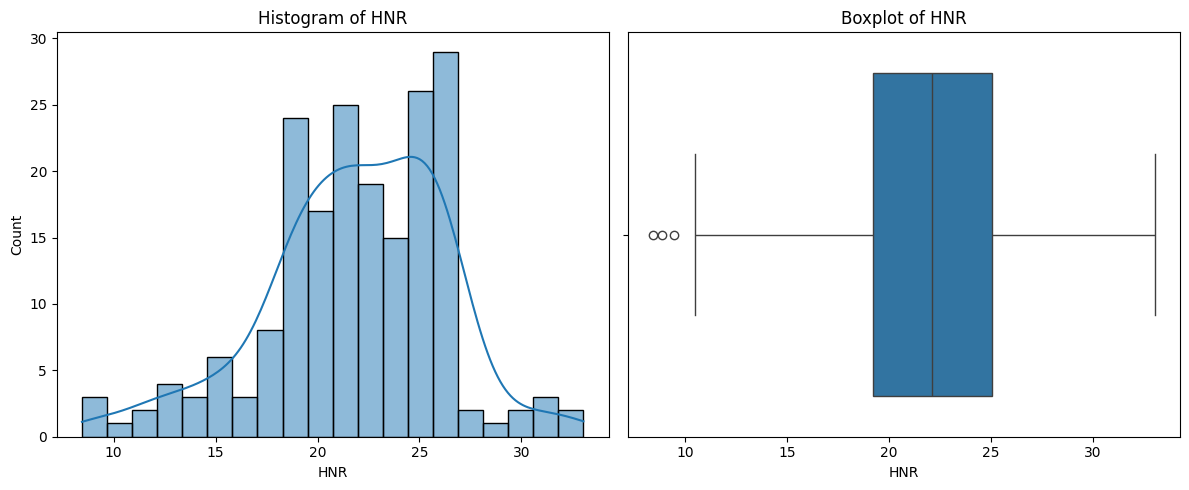

count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: HNR, dtype: float64
-0.5143174975652068


In [198]:
histogram_boxplot(parkinson_data,'HNR')


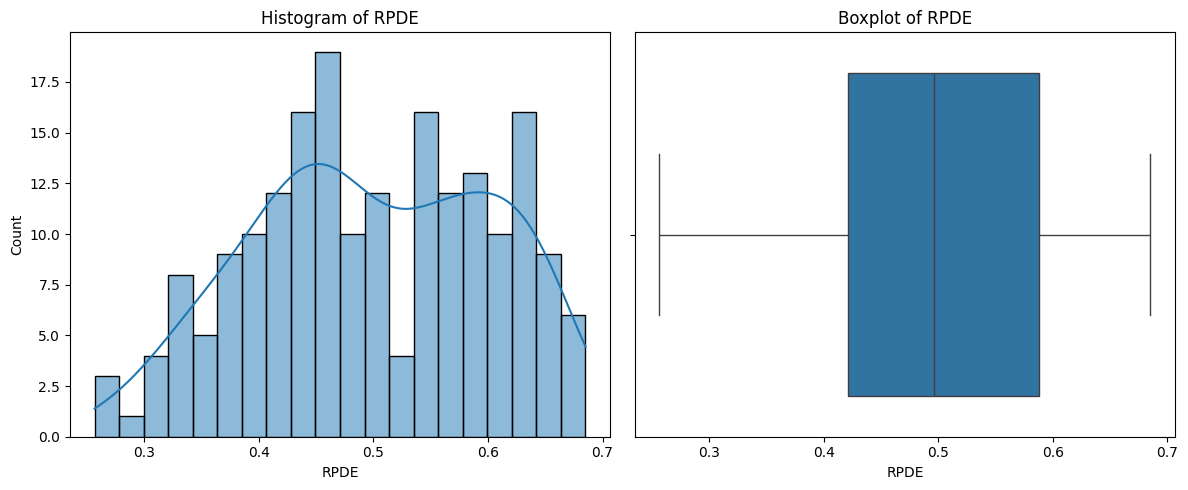

count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: RPDE, dtype: float64
-0.14340241379821705


In [199]:
histogram_boxplot(parkinson_data,'RPDE')


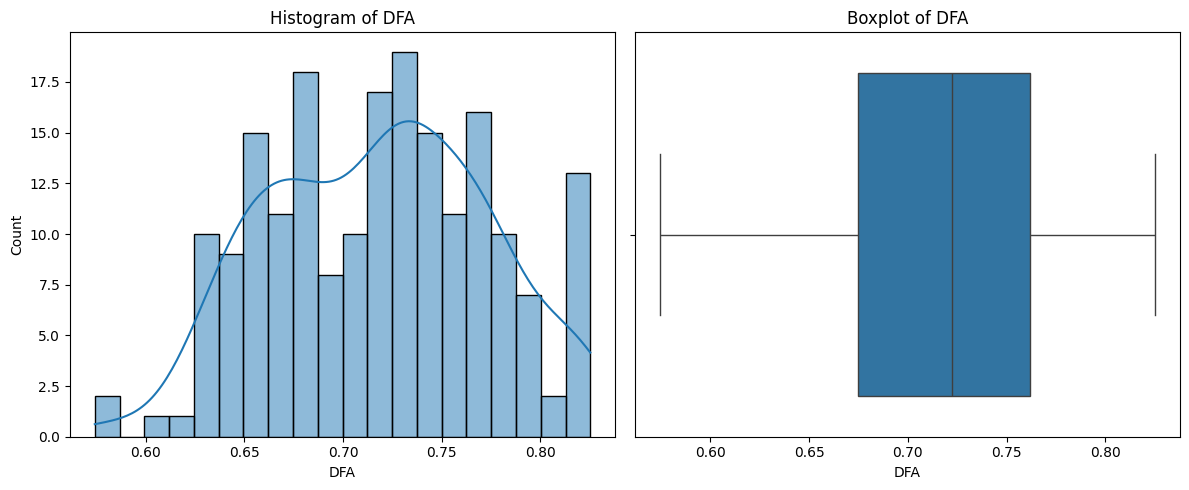

count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: DFA, dtype: float64
-0.03321366071383457


In [200]:
histogram_boxplot(parkinson_data,'DFA')


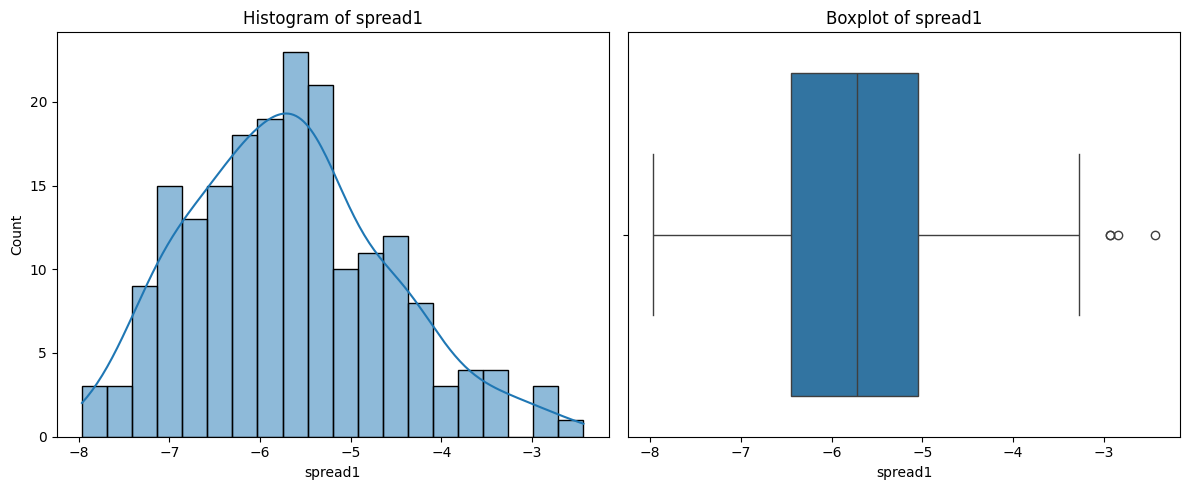

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64
0.4321389320131794


In [201]:
histogram_boxplot(parkinson_data,'spread1')


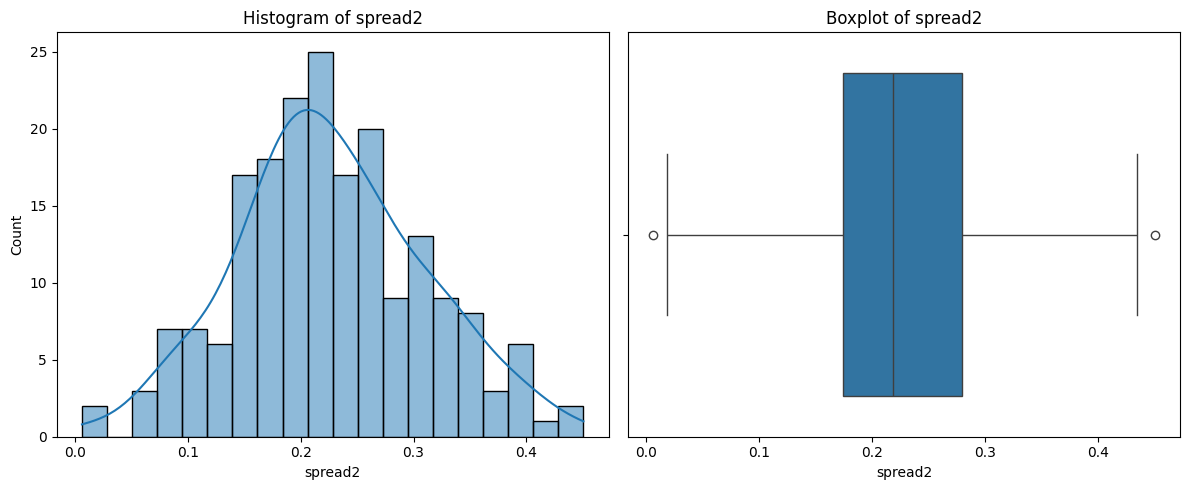

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64
0.1444304854927841


In [202]:
histogram_boxplot(parkinson_data,'spread2')


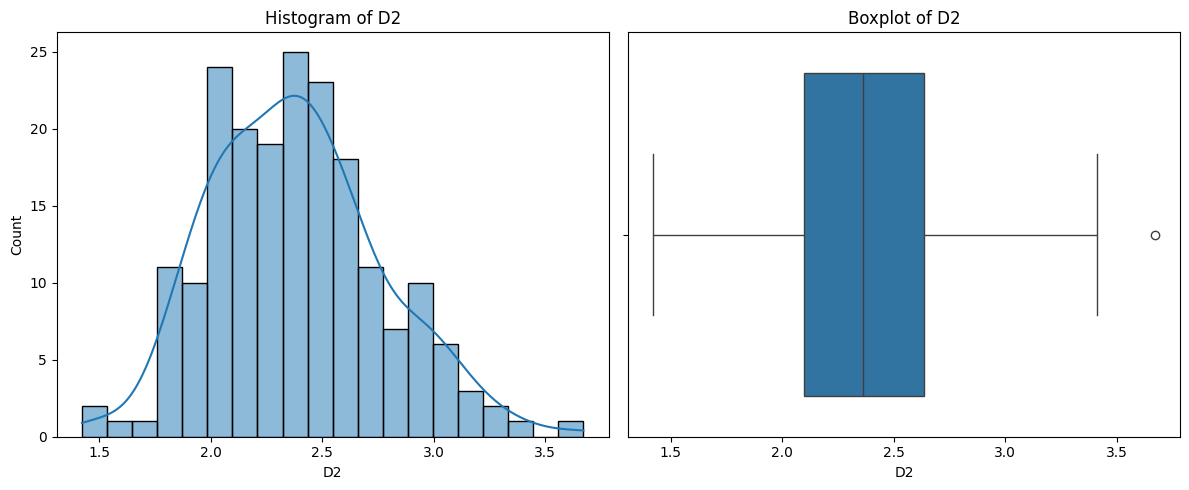

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64
0.4303838913329285


In [203]:
histogram_boxplot(parkinson_data,'D2')


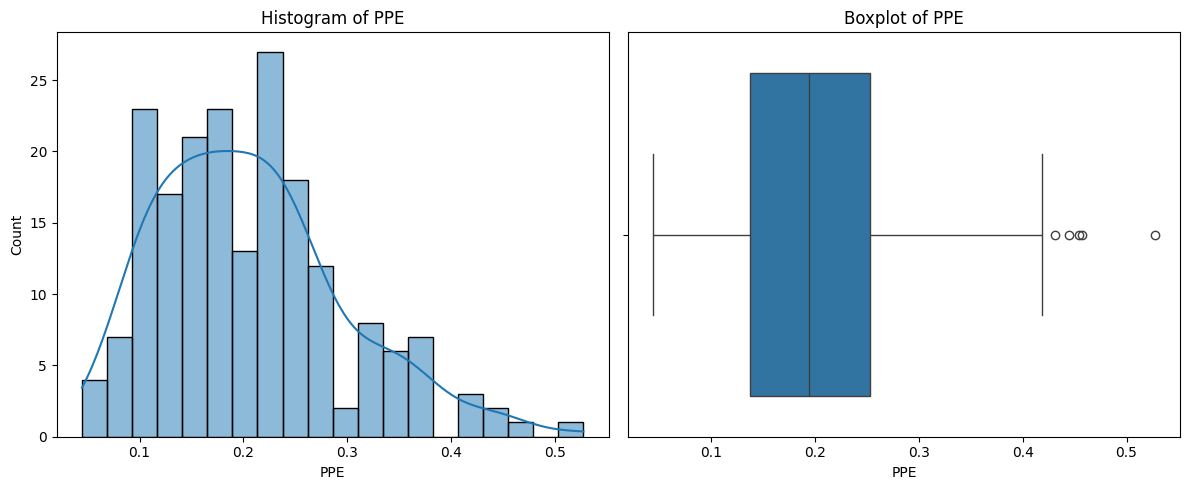

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: PPE, dtype: float64
0.7974910716463577


In [204]:
histogram_boxplot(parkinson_data,'PPE')

<Axes: xlabel='status', ylabel='count'>

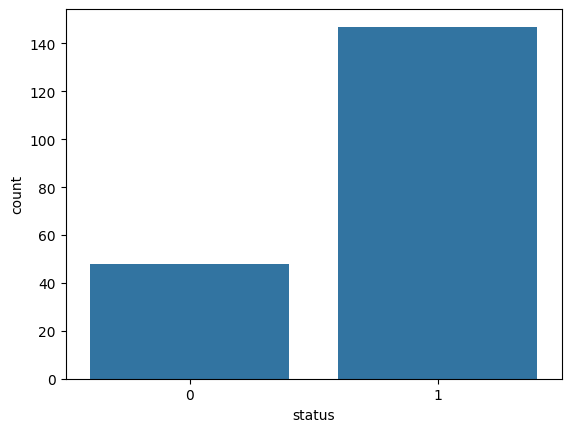

In [205]:
# plotting of 'status':
sns.countplot(data= parkinson_data , x ="status")

In [206]:
print('The number of Persons having Parkinson is = ', parkinson_data[parkinson_data['status'] == 1]['status'].count())
print('The number of Persons not having Parkinson is = ', parkinson_data[parkinson_data['status'] == 0]['status'].count())

The number of Persons having Parkinson is =  147
The number of Persons not having Parkinson is =  48


**'status'** is here the target or the dependent variable. From the above plot it is clear that the number of persons having Parkinson disease is much higher than those not having the disease. The ratio is almost 1:3. So we can assume that the model will have a much better chance to predict status = 1 than predicting status = 0.

#### Bivariate Analysis

Here we will be visualize as to how the different independent attributes vary with respect to the dependent attribute - **'status'**.

In [207]:



def plot_boxplot_with_avg_bar(df, column, target='status'):
    """
    Plots a boxplot and a bar chart showing the average of a numerical column for each category of the target.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to analyze.
        target (str): The categorical column (default is 'status').
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot
    sns.boxplot(ax=axes[0], x=df[target], y=df[column])
    axes[0].set_title(f"Boxplot of {column} vs {target}")
    axes[0].set_xlabel(target)
    axes[0].set_ylabel(column)

    # Barplot (showing mean)
    mean_values = df.groupby(target)[column].mean().reset_index()
    sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")
    axes[1].set_title(f"Average {column} per {target}")
    axes[1].set_xlabel(target)
    axes[1].set_ylabel(f"Average {column}")

    plt.tight_layout()
    plt.show()



In [208]:
def plot_strip_or_swarm(df, column, target='status', kind='swarm'):
    plt.figure(figsize=(8, 5))
    if kind == 'swarm':
        sns.swarmplot(x=target, y=column, data=df, size=3)
    else:
        sns.stripplot(x=target, y=column, data=df, jitter=True)
    plt.title(f'{kind.capitalize()} Plot of {column} vs {target}')
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

In [209]:
for x in parkinson_data.columns:
  print(f"plot_boxplot_with_avg_bar(parkinson_data, '{x}')")

plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Fo(Hz)')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Fhi(Hz)')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Flo(Hz)')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Jitter(%)')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Jitter(Abs)')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:RAP')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:PPQ')
plot_boxplot_with_avg_bar(parkinson_data, 'Jitter:DDP')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Shimmer')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Shimmer(dB)')
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:APQ3')
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:APQ5')
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:APQ')
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:DDA')
plot_boxplot_with_avg_bar(parkinson_data, 'NHR')
plot_boxplot_with_avg_bar(parkinson_data, 'HNR')
plot_boxplot_with_avg_bar(parkinson_data, 'status')
plot_boxplot_with_avg_bar(parkinson_data, 'R

<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


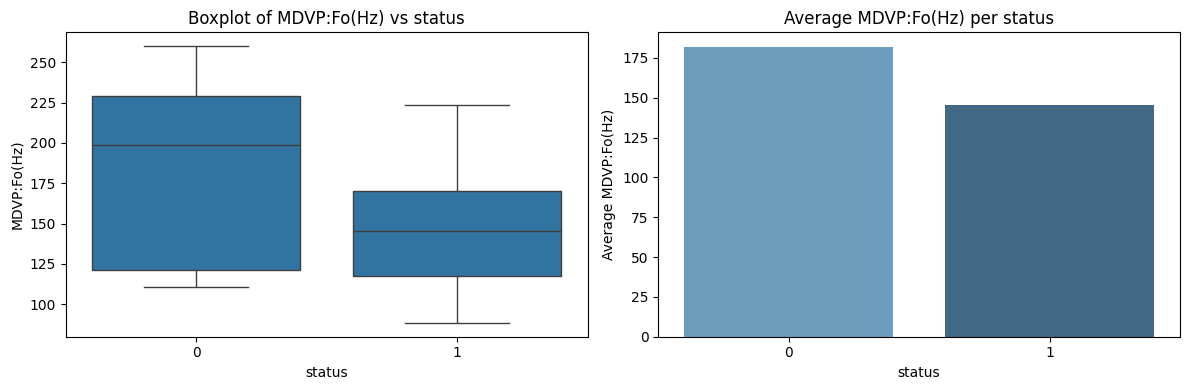

In [210]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Fo(Hz)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


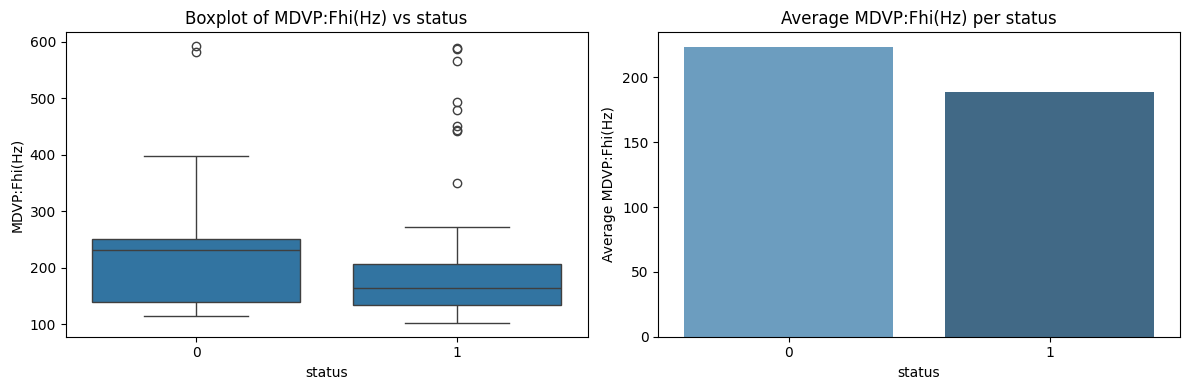

In [211]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Fhi(Hz)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


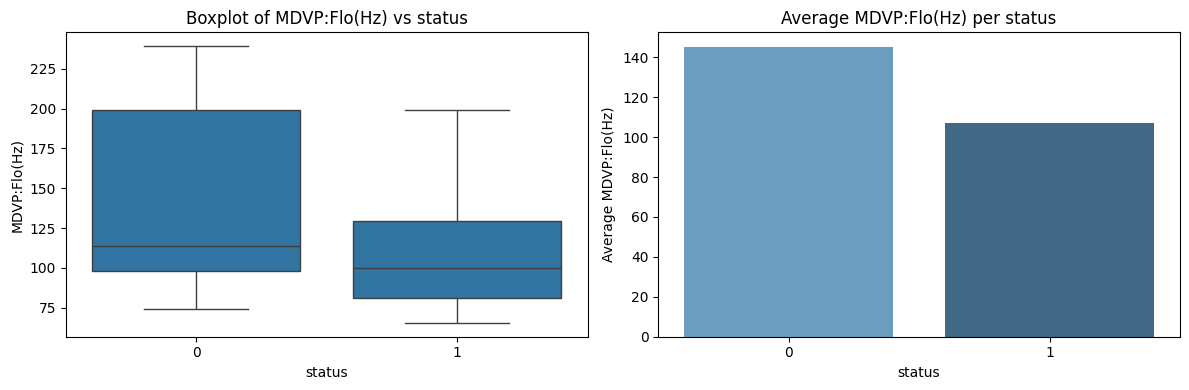

In [212]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Flo(Hz)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


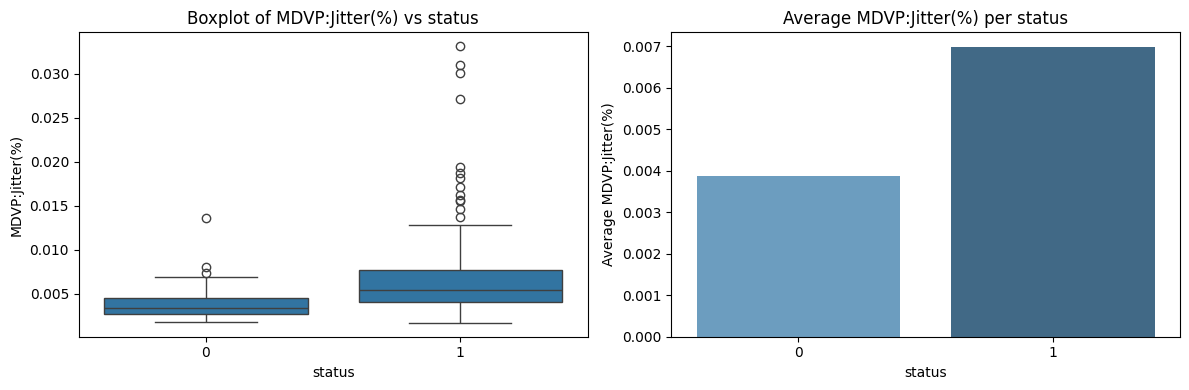

In [213]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Jitter(%)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


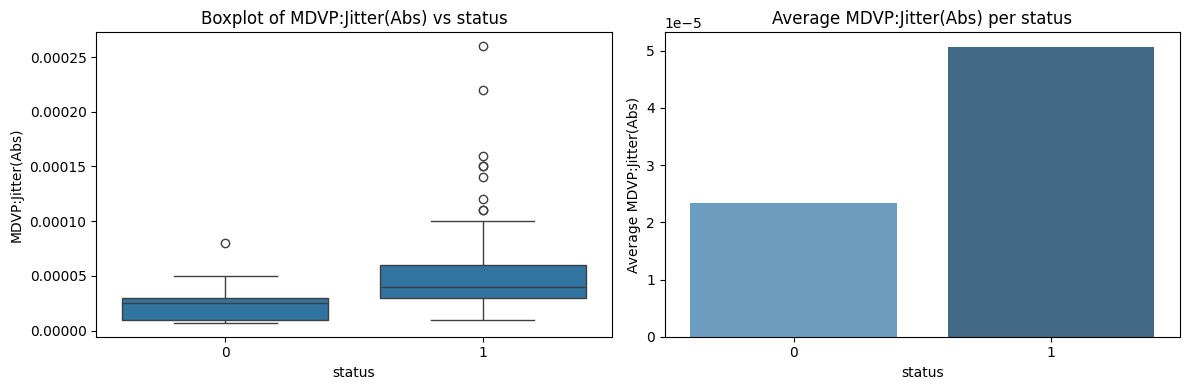

In [214]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Jitter(Abs)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


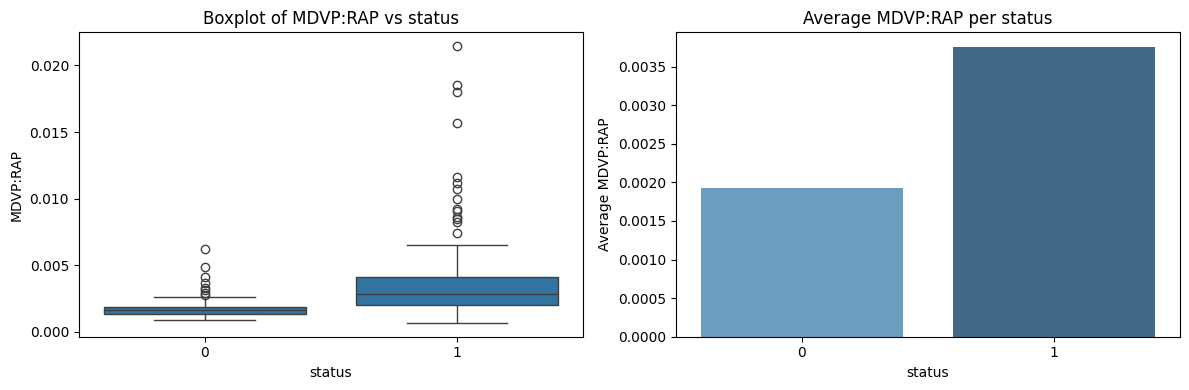

In [215]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:RAP')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


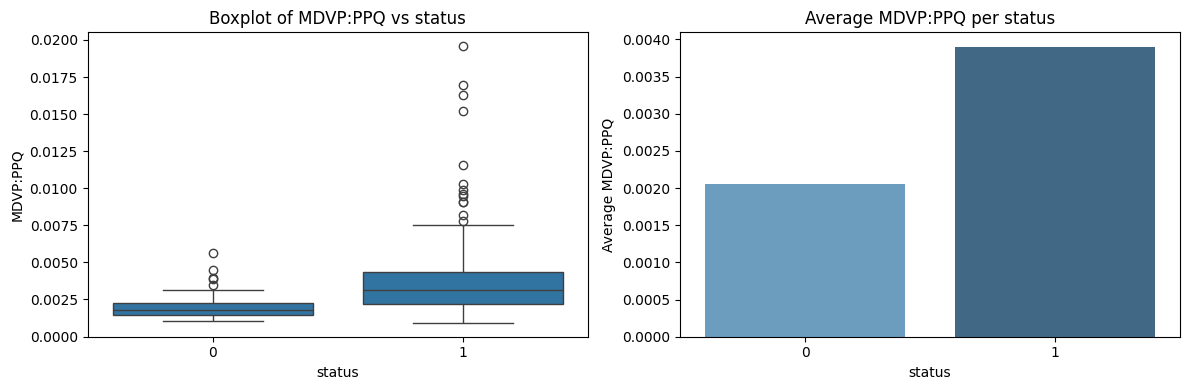

In [216]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:PPQ')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


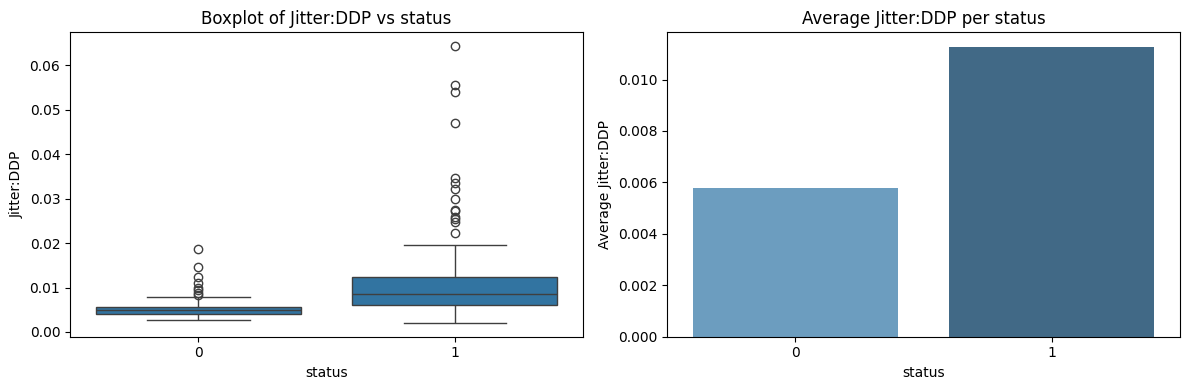

In [217]:
plot_boxplot_with_avg_bar(parkinson_data, 'Jitter:DDP')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


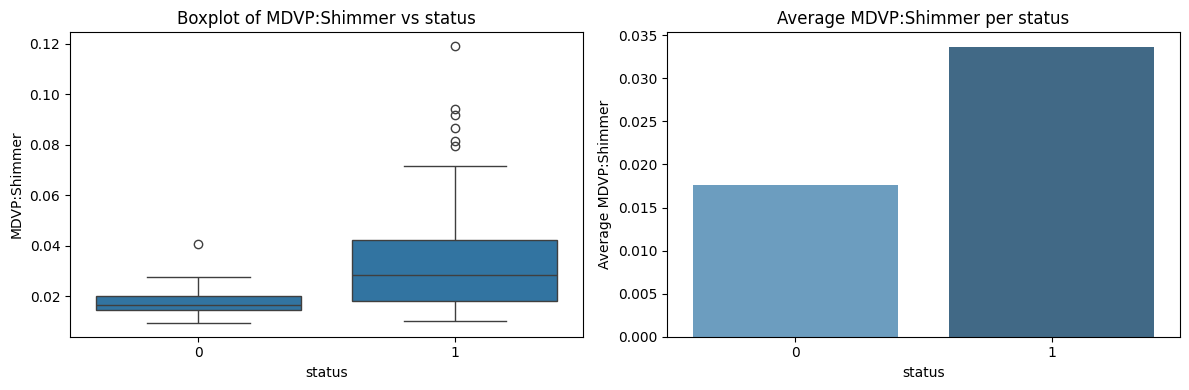

In [218]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Shimmer')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


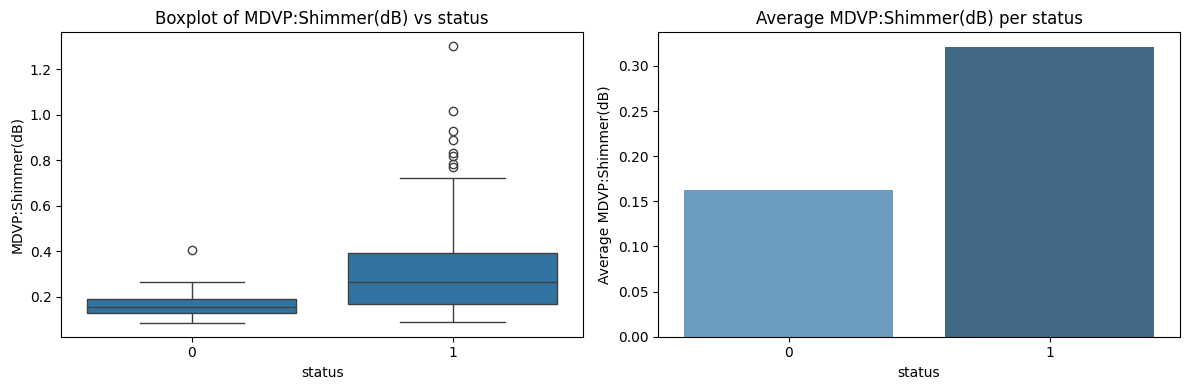

In [219]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:Shimmer(dB)')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


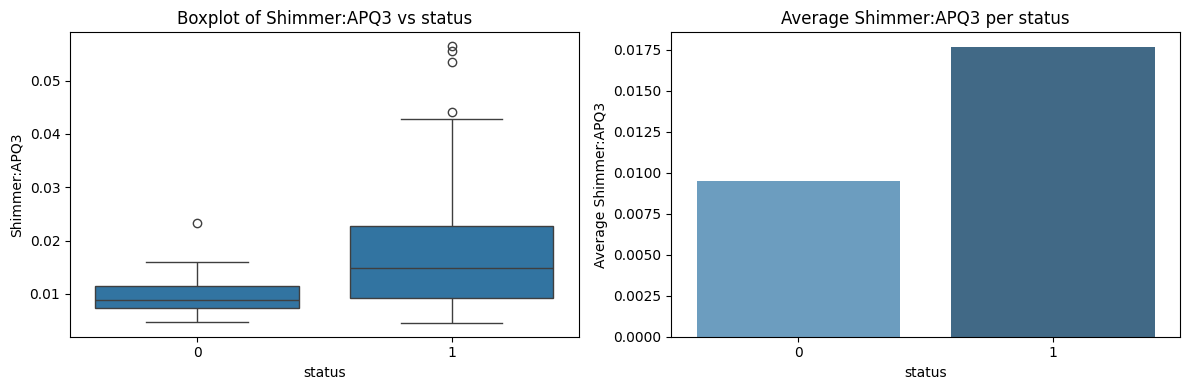

In [220]:
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:APQ3')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


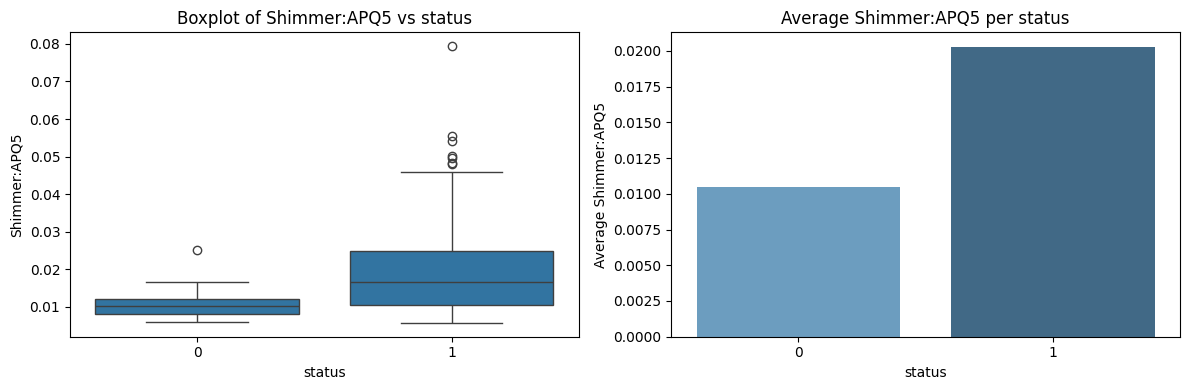

In [221]:
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:APQ5')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


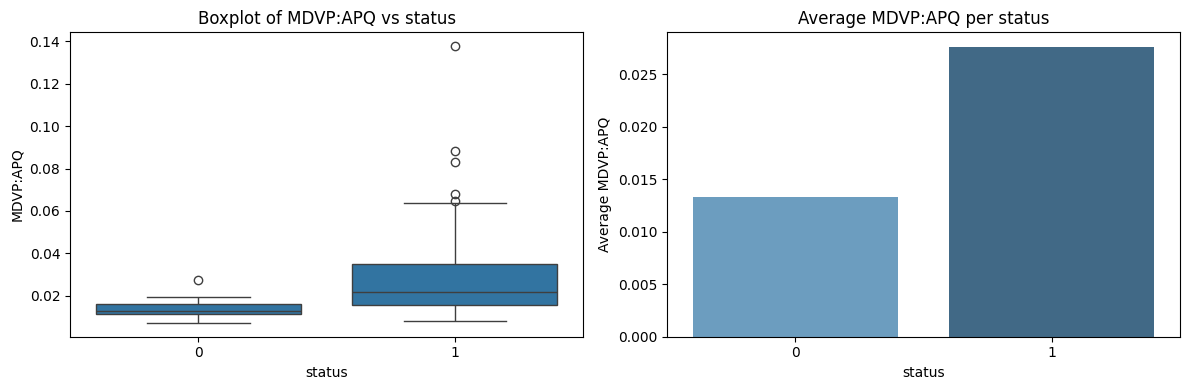

In [222]:
plot_boxplot_with_avg_bar(parkinson_data, 'MDVP:APQ')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


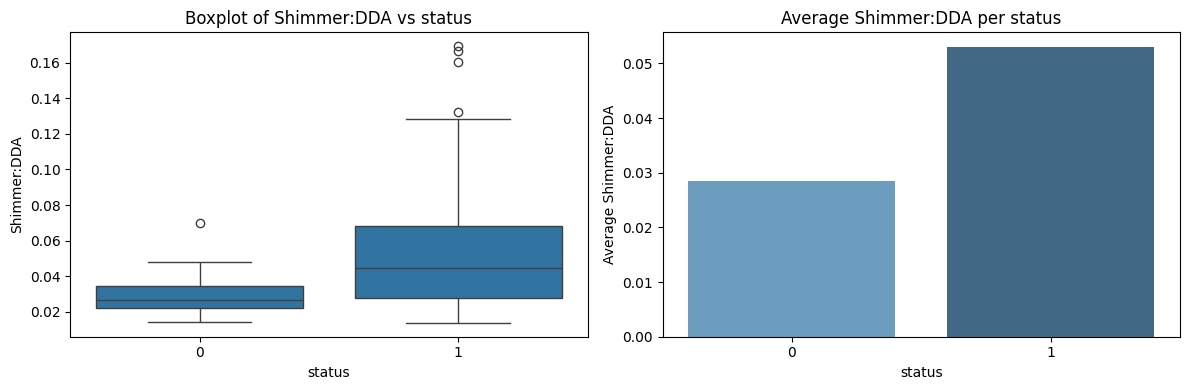

In [223]:
plot_boxplot_with_avg_bar(parkinson_data, 'Shimmer:DDA')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


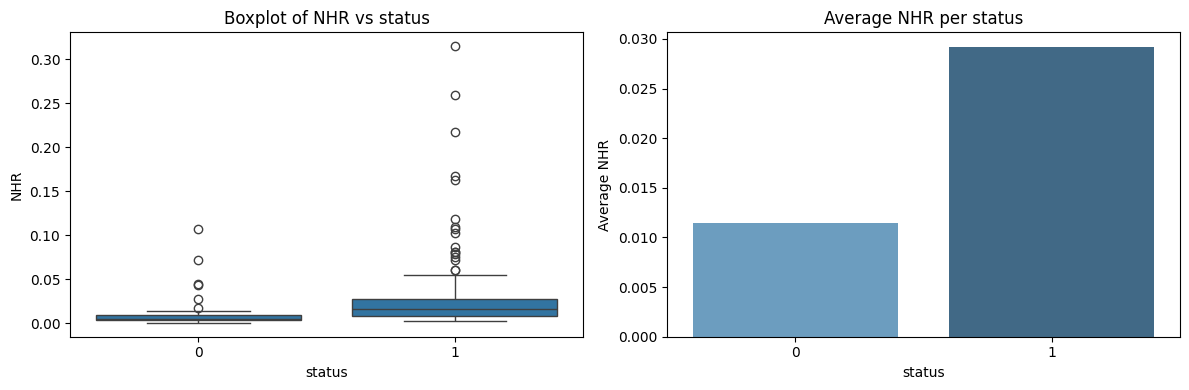

In [224]:
plot_boxplot_with_avg_bar(parkinson_data, 'NHR')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


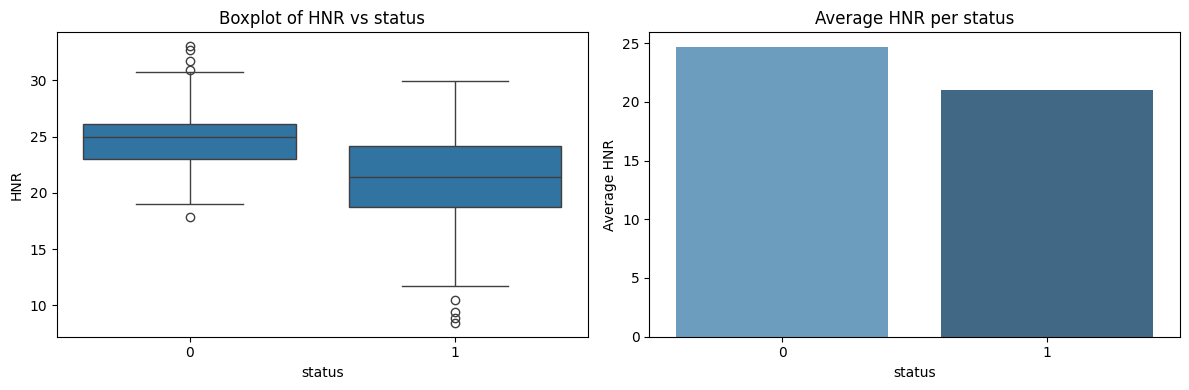

In [225]:
plot_boxplot_with_avg_bar(parkinson_data, 'HNR')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


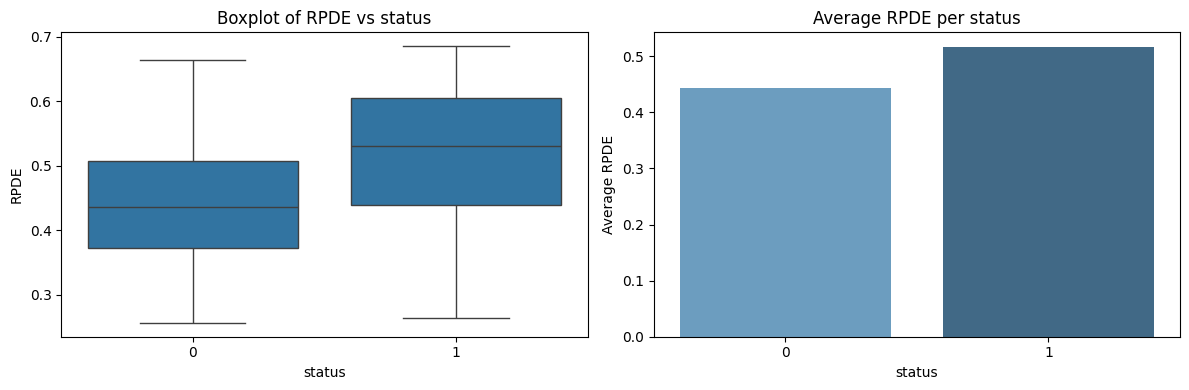

In [226]:
plot_boxplot_with_avg_bar(parkinson_data, 'RPDE')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


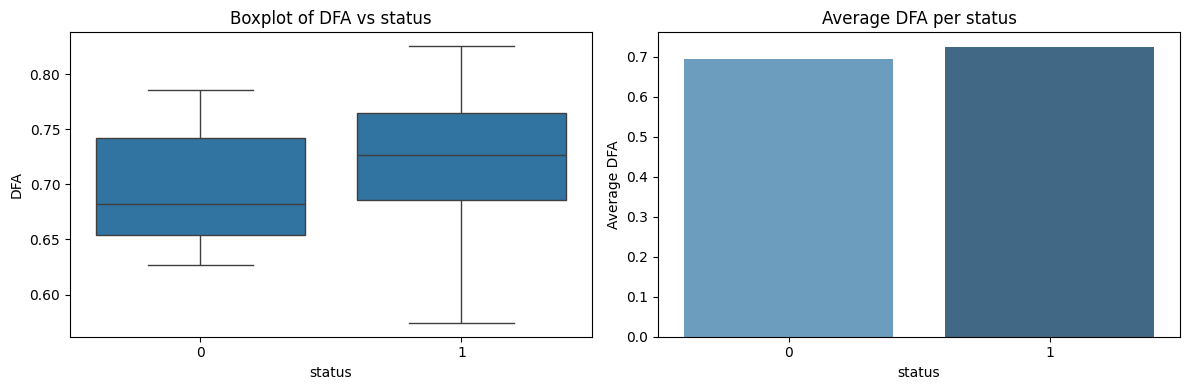

In [227]:
plot_boxplot_with_avg_bar(parkinson_data, 'DFA')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


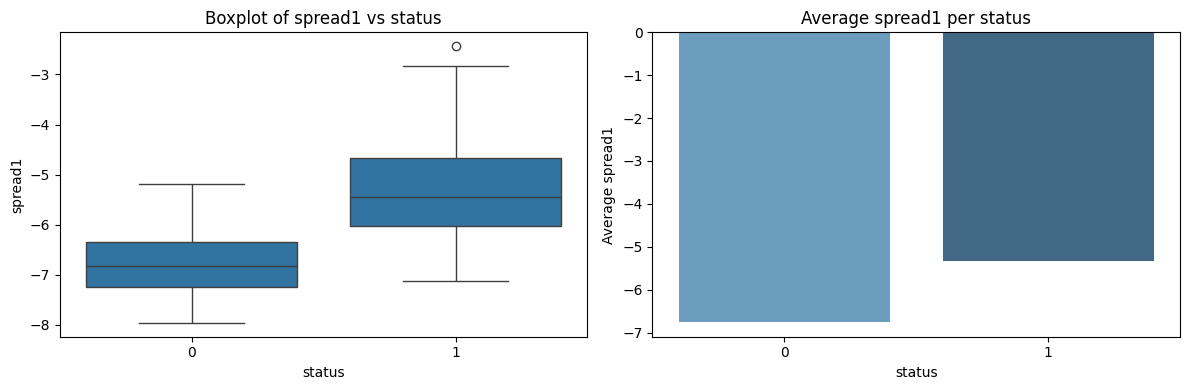

In [228]:
plot_boxplot_with_avg_bar(parkinson_data, 'spread1')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


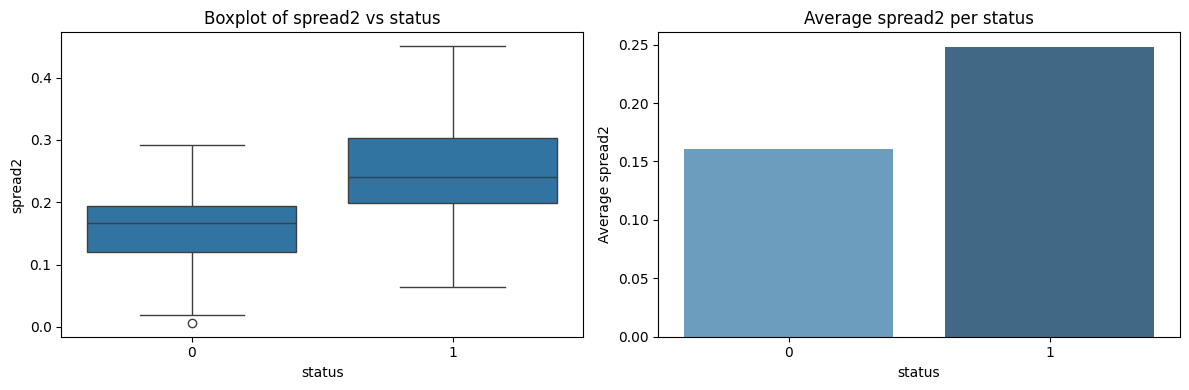

In [229]:
plot_boxplot_with_avg_bar(parkinson_data, 'spread2')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


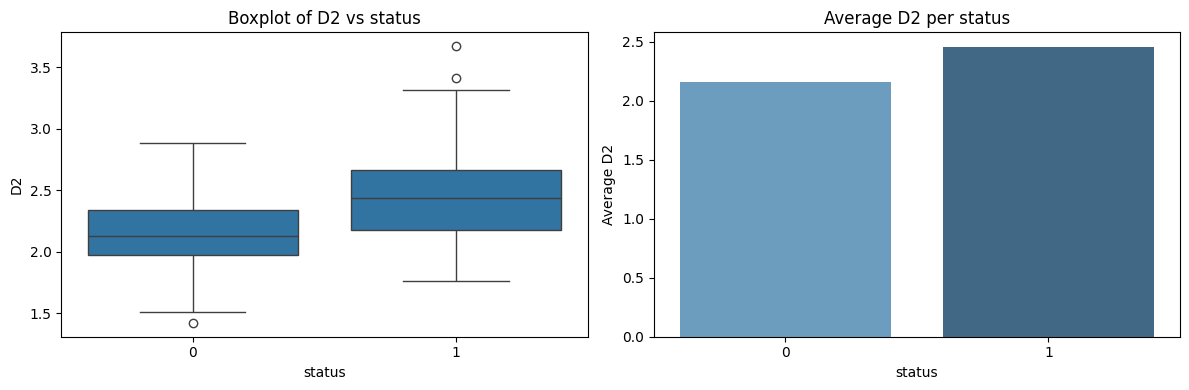

In [230]:
plot_boxplot_with_avg_bar(parkinson_data, 'D2')


<ipython-input-207-51a4ee916f2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


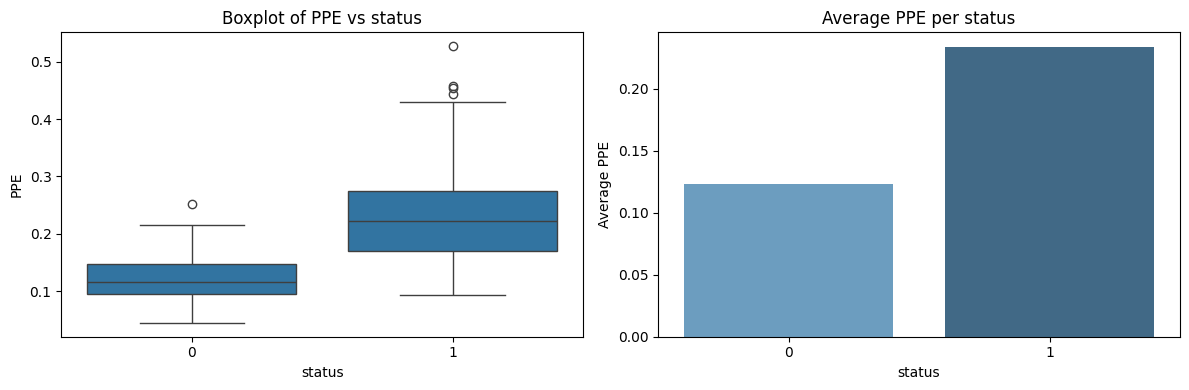

In [231]:
plot_boxplot_with_avg_bar(parkinson_data, 'PPE')

- From the boxplot it is clear that if the person has lower value of **'MDVP:Fo(Hz)'**, **'MDVP:Fhi(Hz)'**, **'MDVP:Flo(Hz)'**, **'HNR'**, then then person is affected by Parkinson.

- From the boxplot it is clear that if the person has higher value of **'MDVP:Jitter(%)'**, **'MDVP:Jitter(Abs)'**, **'MDVP:RAP'**, **'MDVP:PPQ'**, **'Jitter:DDP'**, **'MDVP:Shimmer'**, **'MDVP:Shimmer(dB)'**, **'Shimmer:APQ3'**, **'Shimmer:APQ5'**, **'MDVP:APQ'**, **'Shimmer:DDA'**, **'NHR'**, **'RPDE'**, **'DFA'**, **'spread1'**, **'spread2'**, **'D2'** and **'PPE'** then then person is affected by Parkinson.

#### Multivariate Analysis

This plot along with correlation matrix and heatmap will help us to analyze the relationship between the different attributes.

In [232]:
# sns.pairplot(parkinson_data, hue = 'status')

In [233]:
# calculating the correlation coefficient
corr = parkinson_data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


(23.5, -0.5)

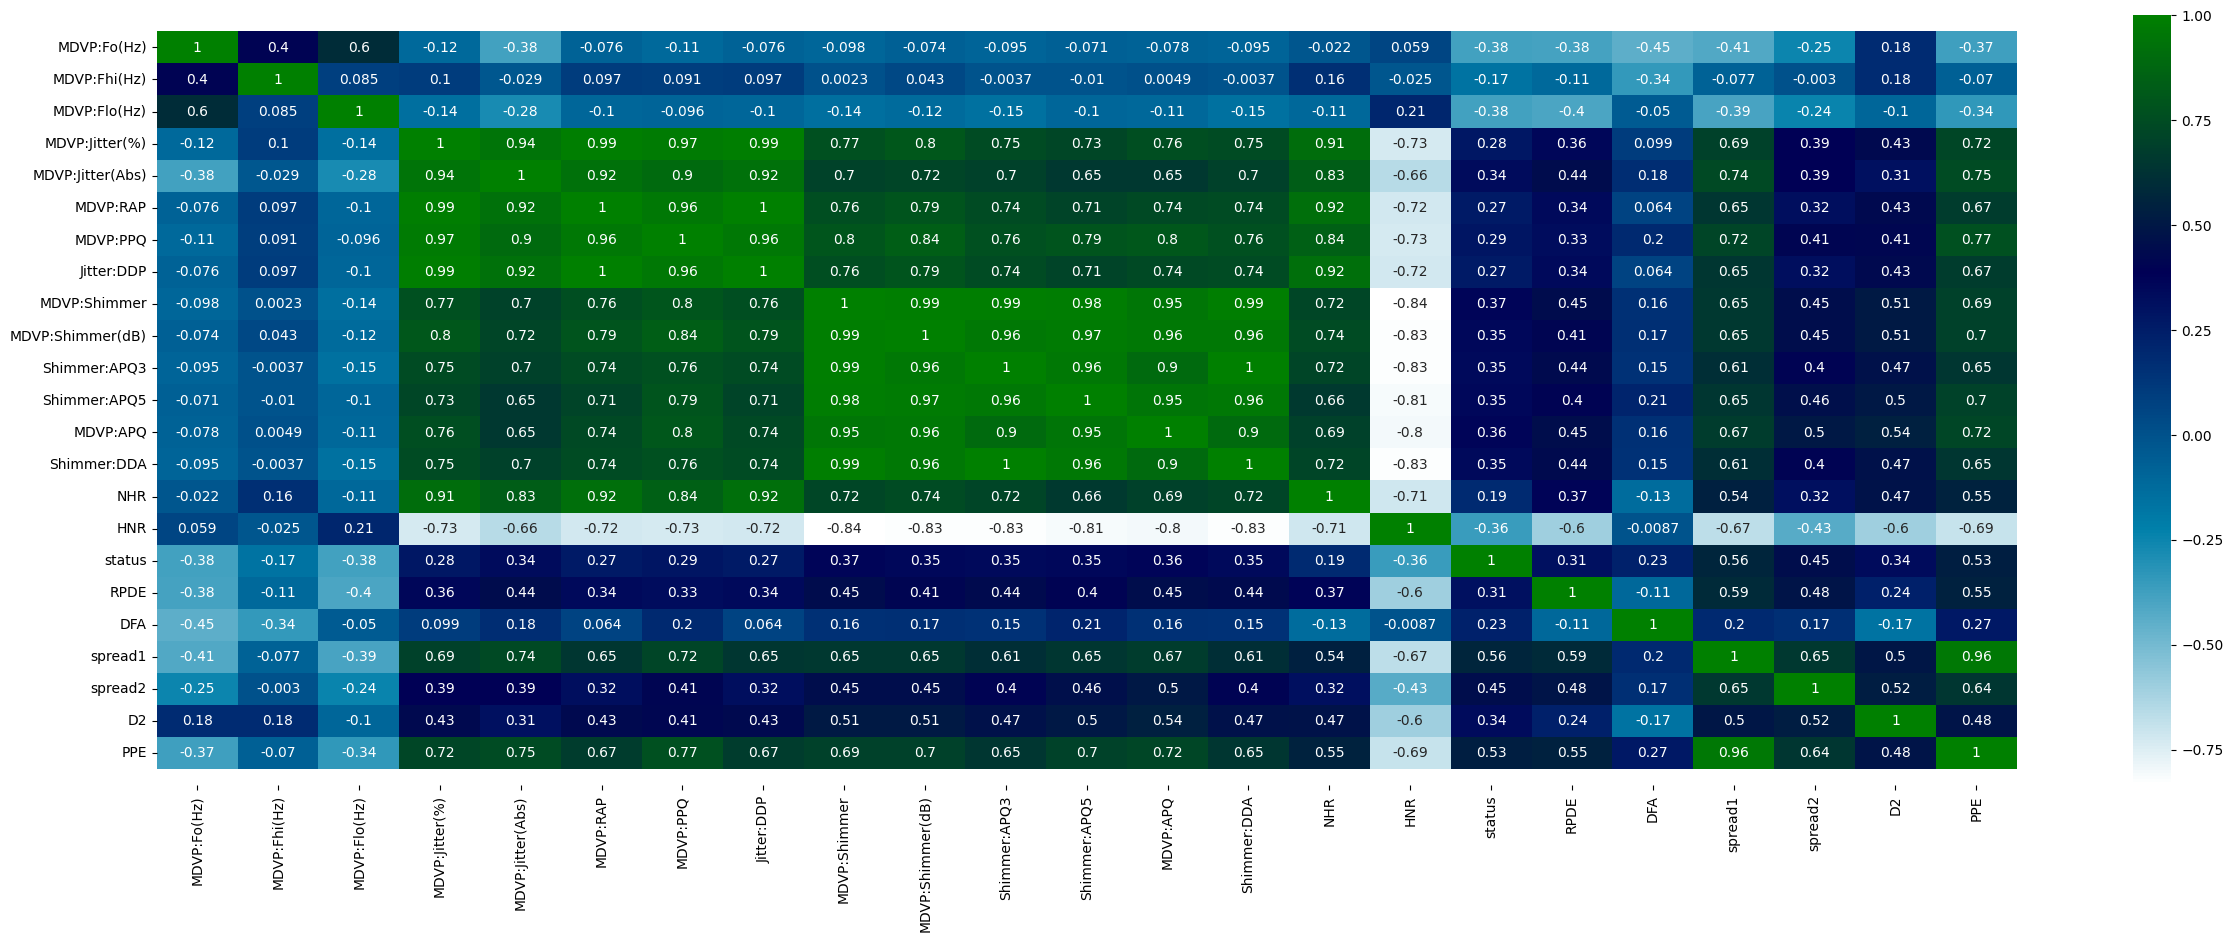

In [234]:
# plotting a heatmap
plt.figure(figsize = (30,10))
ax = sns.heatmap(corr, annot = True, cmap = "ocean_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Thus, from the above three we can see that **MDVP:Jitter(%)** and **MDVP:RAP**, **MDVP:Jitter(%)** and **Jitter(DDP)**, **MDVP:Shimmer** and **MDVP:Shimmer(dB)**, **MDVP:Shimmer** and **Shimmer:APQ3** and **MDVP:Shimmer** and **Shimmer:DDA** all have a correlation value of 0.99.

### 4. Preparation of data for models and Splitting them into test and training dataset

As **MDVP:Jitter(%)** has a correlation of 0.99 with **MDVP:RAP** and **Jitter(DDP)** and similarly, **MDVP:Shimmer** has a correlation of 0.99 with **MDVP:Shimmer(dB)**, **Shimmer:APQ3** and **Shimmer:DDA**, so, we can drop off attributes: **MDVP:Jitter(%)** and **MDVP:Shimmer**.

In [235]:
import pandas as pd

def print_correlated_pairs_in_range(df, lower_bound=0.5, upper_bound=1.0):
    """
    Prints all unique pairs of columns whose absolute correlation values are within the specified range,
    sorted by absolute correlation value in descending order.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    lower_bound (float): Lower bound of the correlation range.
    upper_bound (float): Upper bound of the correlation range.
    """
    corr_matrix = df.corr()
    correlated_pairs = []

    printed = set()

    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                pair = tuple(sorted((col1, col2)))
                if pair not in printed:
                    corr_value = corr_matrix.loc[col1, col2]
                    abs_corr = abs(corr_value)
                    if lower_bound <= abs_corr <= upper_bound:
                        correlated_pairs.append((pair[0], pair[1], corr_value))
                        printed.add(pair)

    # Sort by absolute correlation value (descending)
    correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

    # Pretty print
    if correlated_pairs:
        print(f"{'Column 1':<20}{'Column 2':<20}{'Correlation':>12}")
        print("-" * 52)
        for col1, col2, corr_val in correlated_pairs:
            print(f"{col1:<20}{col2:<20}{corr_val:>12.2f}")
    else:
        print(f"No column pairs found with correlation between {lower_bound} and {upper_bound}.")


In [236]:
print_correlated_pairs_in_range(parkinson_data, 0.8, 1.0)

Column 1            Column 2             Correlation
----------------------------------------------------
Shimmer:APQ3        Shimmer:DDA                 1.00
Jitter:DDP          MDVP:RAP                    1.00
Jitter:DDP          MDVP:Jitter(%)              0.99
MDVP:Jitter(%)      MDVP:RAP                    0.99
MDVP:Shimmer        Shimmer:DDA                 0.99
MDVP:Shimmer        Shimmer:APQ3                0.99
MDVP:Shimmer        MDVP:Shimmer(dB)            0.99
MDVP:Shimmer        Shimmer:APQ5                0.98
MDVP:Jitter(%)      MDVP:PPQ                    0.97
MDVP:Shimmer(dB)    Shimmer:APQ5                0.97
MDVP:Shimmer(dB)    Shimmer:DDA                 0.96
MDVP:Shimmer(dB)    Shimmer:APQ3                0.96
PPE                 spread1                     0.96
MDVP:APQ            MDVP:Shimmer(dB)            0.96
Shimmer:APQ5        Shimmer:DDA                 0.96
Shimmer:APQ3        Shimmer:APQ5                0.96
Jitter:DDP          MDVP:PPQ                  

In [237]:
print_correlated_pairs_in_range(parkinson_data, 0.3, 0.5)

Column 1            Column 2             Correlation
----------------------------------------------------
D2                  spread1                     0.50
D2                  PPE                         0.48
RPDE                spread2                     0.48
D2                  NHR                         0.47
D2                  Shimmer:APQ3                0.47
D2                  Shimmer:DDA                 0.47
Shimmer:APQ5        spread2                     0.46
spread2             status                      0.45
MDVP:Shimmer(dB)    spread2                     0.45
MDVP:Shimmer        spread2                     0.45
MDVP:APQ            RPDE                        0.45
MDVP:Shimmer        RPDE                        0.45
DFA                 MDVP:Fo(Hz)                -0.45
MDVP:Jitter(Abs)    RPDE                        0.44
RPDE                Shimmer:APQ3                0.44
RPDE                Shimmer:DDA                 0.44
D2                  MDVP:Jitter(%)            

## Fixing Outliers

In [238]:
def cap_outliers_iqr(df, target_column):
    """
    Caps the outliers in numerical columns using the IQR method.

    Parameters:
        df (pd.DataFrame): Original DataFrame.
        target_column (str): Column to exclude from outlier treatment.

    Returns:
        pd.DataFrame: DataFrame with outliers capped.
    """
    df_capped = df.copy()
    numeric_cols = df.drop(columns=[target_column]).select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[col] = df[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

    return df_capped

In [239]:
# Cap outliers
capped_parkinson_data = cap_outliers_iqr(parkinson_data, target_column='status')

In [240]:
parkinson_data = capped_parkinson_data

##Dropping correlated columns

In [241]:
# dropping 'MDVP:Jitter(%)' and 'MDVP:Shimmer' from the dataframe:
parkinson_data.drop(['MDVP:Jitter(%)', 'MDVP:Shimmer'], axis = 1, inplace = True)
parkinson_data.head().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007098,0.006980,0.007098
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000
Shimmer:APQ3,0.021820,0.031340,0.027570,0.029240,0.034900
Shimmer:APQ5,0.031300,0.041580,0.038580,0.040050,0.041580


#### Splitting of Data into Training and Test Set in the ratio of 70:30 respectively

In [242]:
X = parkinson_data.drop('status', axis = 1)
y = parkinson_data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Here, the independent variables are denoted by **'X'** and the predictor is represented by **'y'**.

We will also standardize the dataset:

In [243]:
# standardization of the training and test data set
scaled_X_train = preprocessing.StandardScaler().fit_transform(X_train)
scaled_X_test = preprocessing.StandardScaler().fit_transform(X_test)

### 5. Train at least 3 standard classification algorithms and note down their accuracies on the test data.

#### **Logistic Regression**

In [244]:
LogReg_model = LogisticRegression(random_state = 1)
LogReg_model.fit(scaled_X_train, y_train)

LogisticRegression(random_state=1)

In [245]:
pred_log = LogReg_model.predict(scaled_X_test)
predictprob_log = LogReg_model.predict_proba(scaled_X_test)

pred_log
result = LogReg_model.score(scaled_X_test, y_test)
print(result)

0.8305084745762712


#### **SVM**

In [246]:
svm_model = SVC(C = 10.0, gamma = 0.1, random_state = 1)
svm_model.fit(scaled_X_train, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [247]:
pred_svm = svm_model.predict(scaled_X_test)
result = svm_model.score(scaled_X_test, y_test)
print(result)

0.864406779661017


In [248]:
X.shape

(195, 20)

## **Apply PCA**

In [249]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data (very important before PCA!)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Apply PCA to reduce dimensions, keeping 95% of the explained variance
pca = PCA(20) #1-23
X_pca = pca.fit_transform(scaled_data)  # Fit PCA on the features and transform

# Check the transformed features after PCA
X_pca


# Split the PCA-reduced data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

## PCA that account for 99% variance

In [250]:
X_pca.shape

(195, 20)

## **Amount of Variance explained by each PC**

In [251]:
pca.explained_variance_ratio_

array([5.62372203e-01, 1.27997630e-01, 7.65101077e-02, 6.36201908e-02,
       4.96801923e-02, 3.13181780e-02, 2.54610775e-02, 1.71742159e-02,
       1.39699941e-02, 1.02014327e-02, 6.66113026e-03, 5.04387533e-03,
       3.85291033e-03, 2.22526051e-03, 1.77266709e-03, 1.11899794e-03,
       5.53428237e-04, 4.66455065e-04, 5.15084196e-08, 1.98716601e-09])

In [256]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio * 100:.2f}%")

PC1: 56.24%
PC2: 12.80%
PC3: 7.65%
PC4: 6.36%
PC5: 4.97%
PC6: 3.13%
PC7: 2.55%
PC8: 1.72%
PC9: 1.40%
PC10: 1.02%
PC11: 0.67%
PC12: 0.50%
PC13: 0.39%
PC14: 0.22%
PC15: 0.18%
PC16: 0.11%
PC17: 0.06%
PC18: 0.05%
PC19: 0.00%
PC20: 0.00%


## **Cummulative Variance explained by PCs together**

In [252]:
pca.explained_variance_ratio_.cumsum()*100

array([ 56.23722026,  69.03698327,  76.68799404,  83.05001312,
        88.01803235,  91.14985015,  93.69595789,  95.41337949,
        96.8103789 ,  97.83052217,  98.4966352 ,  99.00102273,
        99.38631377,  99.60883982,  99.78610653,  99.89800632,
        99.95334914,  99.99999465,  99.9999998 , 100.        ])

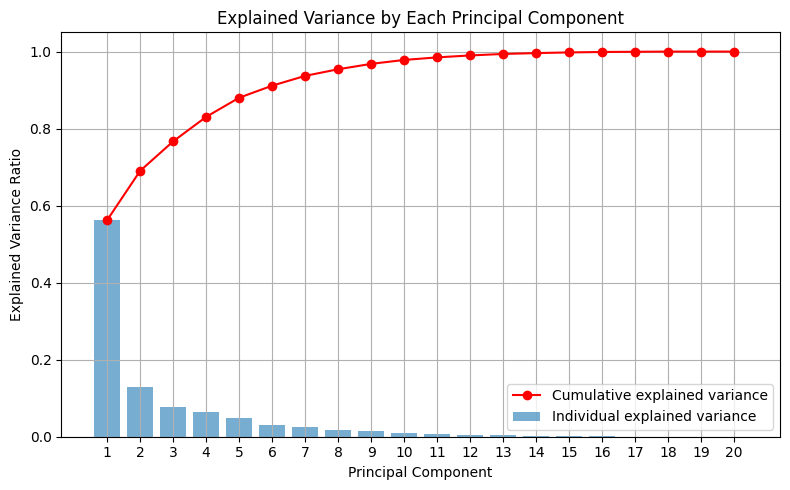

In [253]:

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##**Logistic Regression with PCA**

In [254]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

result = model.score(X_test_pca, y_test)
print(result)

0.8717948717948718


## **SVM With PCA**

In [255]:

svm_model = SVC(C = 10.0, gamma = 0.1)
svm_model.fit(X_train_pca, y_train)

pred_svm = svm_model.predict(X_test_pca)
result = svm_model.score(X_test_pca, y_test)
print(result)

0.8974358974358975


##**In this case PCA worked really well bringing down the dimensions from 20 to just 12 and still explaining 99% variance in data - also improved accurace**